**Full Name:** Jesús G. Galaz-Montoya

**Email Address:** jgalaz@gmail.com

**Date:** March 10, 2025

**Problem Statement of Submission:** Lending Club Loan Approval System

# Lending Club Loan Approval System

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

## Starter Code

### Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

In [4]:
### If the file is somewhere in Google Drive
#from google.colab import drive
#drive.mount("/content/drive")

### Check if you uploaded file to /content/sample_data/ correctly
#import os
#print(os.getcwd())
#print(os.listdir("/content/sample_data/"))


In [4]:
# Adjust file_path as needed to reflect the location of the loans.csv file on your system
#file_path = '/content/sample_data/loans.csv'
file_path = '~/case_study_1_loan_approval_system/loans.csv'

try:
  df = pd.read_csv(file_path)
except FileNotFoundError:
  raise Exception(f"\nFile={file_path} not found; make sure the path to the cvs file and file name are correct.")

In [5]:
# Inspect the first few rows of the data

print(df.head(10))

### Initial impression: It's weird that "member_id", "inq_last_6mths", "open_acc" and other variables that
### would be expected to take only int values seem to be float; also, weird that emp_length is a str.


        id  member_id  loan_amnt        term int_rate  installment grade  \
0  1077501  1296599.0     5000.0   36 months   10.65%       162.87     B   
1  1077430  1314167.0     2500.0   60 months   15.27%        59.83     C   
2  1077175  1313524.0     2400.0   36 months   15.96%        84.33     C   
3  1076863  1277178.0    10000.0   36 months   13.49%       339.31     C   
4  1075269  1311441.0     5000.0   36 months    7.90%       156.46     A   
5  1069639  1304742.0     7000.0   60 months   15.96%       170.08     C   
6  1072053  1288686.0     3000.0   36 months   18.64%       109.43     E   
7  1071795  1306957.0     5600.0   60 months   21.28%       152.39     F   
8  1071570  1306721.0     5375.0   60 months   12.69%       121.45     B   
9  1070078  1305201.0     6500.0   60 months   14.65%       153.45     C   

  sub_grade emp_length home_ownership  ...    dti delinq_2yrs inq_last_6mths  \
0        B2  10+ years           RENT  ...  27.65         0.0            1.0   
1  

In [6]:
# Check the dataframe structure - datatypes and number of non-null rows

df.info()

### emp_length must have some null values, because No. of non-null < for other variables.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [7]:
## Check the shape

### In addition, we can use df.ndim to see how many axes there are, and df.size for how many total elements
print(f"\nShape={df.shape}\nDimensions={df.ndim}\nSize={df.size}")


Shape=(38770, 23)
Dimensions=2
Size=891710


In [16]:
### We can get basic statistics for the numerical columns in the dataframe to get a feel for them
df.describe()
### [We could have converted emp_length to numerical if we wanted to include it in the quantitative analysis of describe()]

,id,member_id,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,last_pymnt_amnt
count,3.877000e+04,3.877000e+04,38770.000000,38770.000000,3.877000e+04,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000
mean,6.769960e+05,8.430892e+05,11069.122388,322.629489,6.880025e+04,13.276704,0.146660,0.871473,9.278850,0.055404,13297.262626,22.059788,2735.887820
std,2.090226e+05,2.641345e+05,7362.292600,208.592815,6.416132e+04,6.676355,0.492197,1.071444,4.401871,0.237727,15861.575434,11.420556,4486.352373
min,5.473400e+04,7.069900e+04,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5.127032e+05,6.619100e+05,5325.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3654.000000,13.000000,216.822500
50%,6.579935e+05,8.410920e+05,9737.500000,278.150000,5.892350e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8777.000000,20.000000,565.400000
75%,8.287202e+05,1.037010e+06,15000.000000,426.100000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16938.000000,29.000000,3425.470000
max,1.077501e+06,1.314167e+06,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,36115.200000


In [10]:
## Check the missing values across the columns

df.isnull().sum()

### As predicted, emp_length indeed has null values (so does revol_util)



id                        0
member_id                 0
loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1036
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
last_pymnt_amnt           0
loan_status               0
dtype: int64

- Document your observations

# Observations

**0)** id and member_id may be both redundant and irrelevant and thus one can probably be dropped; we only need 1 to identify the members/accounts that are credit-worthy. It's possible that a single member might have multiple loans though; but if they both have the same number of unique values, then it suggests there's only 1 loan per member.

**1)** I didn't detect overt issues with the data, but some aspects seemed odd:
**1.1)** It's weird that "member_id", "inq_last_6mths", "open_acc" and other variables that would be expected to take only int values seem to be float (you canno't have a fractional member_id, or a fractional number of inquiries into your credit, or a fractional number of accounts).
**1.2)** It was also weird that emp_length is a str, with seemingly 3 categories: < 1 year, 10+ years, and numbers in between 1 and 10 years. It seems that this information would allow for more precise analyses if it were turned into numerical; treating years from 1 to 10 as "the same" seems like a missed opportunity for finer analysis of correlations between credit worthiness and employment length (if any exist).

**2)** It is understandable/expected that some people may have never been employed; but this is no justification for the null values in emp_length. If that is the case, the value should be < 1 year. Similarly, the missing values for revol_util (credit utilization?) could reflect people that have never had or don't currently have any other credit. But since the information was not recorded, a choice will be have to be made between:
**2.1)** Imputing these null values with a reasonable guess, like 0 (at the risk of this assumption introducing distorsions in the model), or with mean or median.
**2.2)** Excluding the rows with these missing values, at the risk of losing the information for all the other columns that do have values.
**2.3)** To decide between 2.1 and 2.2, we should first determine the relevance of emp_length and revol_util. We can also implement a check for revol_util, using revol_bal; if revol_bal=0, indeed it is a reasonabe assumption that revol_util=0. If revol_bal != 0, then the value should be imputed with mean or median (depending on whether there are outliers or not and how "skewed" the data are for that column).

### Data Cleaning

- Perform missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

In [11]:
### I will first check whether id and member_id are redundant; i.e., if there's only 1 loan account per
### member, we may not need to keep both identifiers, and either id can be used to classify the members
### as credit-worthy or not, so no need to keep both
#df[['id', 'member_id']].duplicated().sum()
df['id'].nunique(), df['member_id'].nunique()

(38770, 38770)

In [12]:
### Given the same number of unique values in id and member_id, I will drop member_id
### to reduce the size of the dataframe instead of carrying an extra parasitic column in downstream processing
df = df.drop('member_id', axis=1)


In [13]:
### We should now have 22 columns instead of 23
print(f"\nShape={df.shape}\nDimensions={df.ndim}\nSize={df.size}")


Shape=(38770, 22)
Dimensions=2
Size=852940


In [15]:
### Now I'll check what's going on with revol_util. If revol_bal == 0 for all misisng revol_util,
### I will safely impute this with 0s, as these are people with no credit. If revol_bal is NOT 0,
### Then I'll figure out whether to impute with median or mean
print(f"Number of rows with revol_util==0, { df[ df['revol_util'].isnull() ].shape[0]}")
print(f"Number of rows with revol_bal==0, {df[df['revol_bal'] == 0].shape[0]}")
print(f"Number of rows with null revol_util AND 0 revol_bal, {df[(df['revol_util'].isnull()) & (df['revol_bal'] == 0)].shape[0]}" )
print(f"Number of rows with null revol_util AND non-zero revol_bal, {df[(df['revol_util'].isnull()) & (df['revol_bal'] != 0)].shape[0]}" )

### To check whether the revol_util column is "normal"/skewed or not, I first need to convert all
### non-null values from str to float.
df['revol_util'] = df['revol_util'].replace('%', '', regex=True).astype('float') / 100
df['revol_util'].skew()

Number of rows with revol_util==0, 50
Number of rows with revol_bal==0, 977
Number of rows with null revol_util AND 0 revol_bal, 49
Number of rows with null revol_util AND non-zero revol_bal, 1


-0.02817789871605848

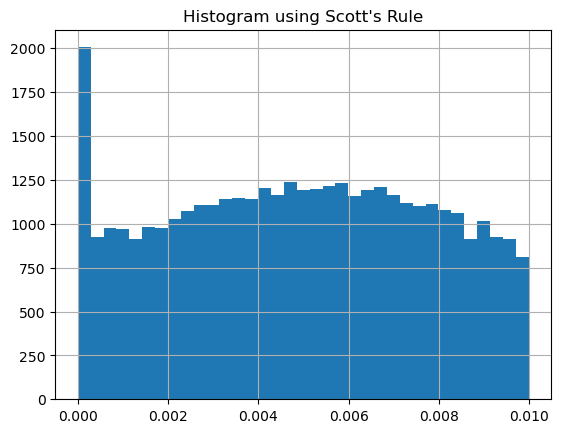

In [ ]:
### The skew seems low. I will also make a histogram plot to examine whether revol_util seems normally distributed.
### The optimal number of bins can be mathematically derived from the data depending on whether it's normal/Guassian
### or not. While skewness is not a measure for normality per se, the low number suggests normality and not
### too many extreme outlieres; thus, I'll plot the histogram with a number of bins assuming it is normal.
### I'll use "Scott's Rule" since "Sturge's rule" is more adequate for small datasets (n<30).

bin_width_scott = 3.5 * np.std(df['revol_util'].dropna()) / len(df['revol_util'])**(1/3)
nbins = int(np.ceil((df['revol_util'].max() - df['revol_util'].min()) / bin_width_scott))
#print(f"Bins (Scott's Rule): {nbins}")

df['revol_util'].hist(bins=nbins)
plt.title('Histogram using Scott\'s Rule')
plt.show()


In [18]:
### It seems that revol_util is NOT normal. However, Scott's Rule is still better than an arbitrary
### number of bins. Regardless, if revol_bal == 0 (reflecting used credit balance), then revol_util (percentage of credit utilized) 
### logically MUST also be 0, since the borrower isn't using any credit. So I will impute those values with 0.
### The one case where revol_util == null and revol_bal !=0 I will impute with median, based on the
### distribution above (it seems "bimodal"; i.e., there's a large and sharp peak near zero,
### then another broad peak between 0.4 and 0.6)

#### Impute rows where 'revol_util' is null and 'revol_bal' is 0 with 0
df.loc[(df['revol_util'].isnull()) & (df['revol_bal'] == 0), 'revol_util'] = 0

### Impute the single row where 'revol_util' is null and 'revol_bal' is not 0 with the median
df.loc[(df['revol_util'].isnull()) & (df['revol_bal'] != 0), 'revol_util'] = df['revol_util'].median()




In [19]:
### Verify that revol_util no longer has null values
df.isnull().sum()

id                        0
loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1036
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
last_pymnt_amnt           0
loan_status               0
dtype: int64

In [20]:
### Now I'll examine emp_length (how many unique values does it have?)
print(df['emp_length'].nunique())
print(df['emp_length'].unique())



11
['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan]


In [22]:
### Since it seems to be a pseudo-categorical feature, I will first impute the NaN values with the mode.
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [23]:
### Given the nature of emp_length values,
### it could be useful to convert them into numerical,
### so that I can correlate this feature with other numerical features more easily
#print(df['emp_length'].nunique())
#print(df['emp_length'].unique())

### Replace '< 1 year' with '0'
df['emp_length'] = df['emp_length'].replace('< 1 year', '0')

### Remove ' years', ' year', and '+' from emp_length values
df['emp_length'] = df['emp_length'].str.replace(' years', '').str.replace('+', '').str.replace(' year', '')

#### Convert the cleaned values to integers
df['emp_length'] = df['emp_length'].astype(int)


/var/folders/w5/tx08gb4x0rs_qxhvcgngjb4h0000gn/T/ipykernel_93946/2875240723.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['emp_length'] = df['emp_length'].str.replace(' years', '').str.replace('+', '').str.replace(' year', '')


In [24]:
### I will verify that emp_length is numberical and no longer has null values
print(df['emp_length'].nunique())
print(df['emp_length'].unique())
#type(df['emp_length'][0])
df.isnull().sum()

11
[10  0  3  8  9  4  5  1  6  2  7]


id                     0
loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_pymnt_amnt        0
loan_status            0
dtype: int64

##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [25]:
## Drop the above columns

### I had already dropped member_id as explained above.
### Now I will drop all the other suggested columns.
df = df.drop('id', axis=1)
df = df.drop('installment', axis=1)
df = df.drop('last_pymnt_amnt', axis=1)


In [27]:
## Check the dataframe again

### We should now have 19 columns instead of 23
print(f"\nShape={df.shape}\nDimensions={df.ndim}\nSize={df.size}")


Shape=(38770, 19)
Dimensions=2
Size=736630


In [28]:
df.head(10)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,5000.0,36 months,10.65%,B,B2,10,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,0.00837,9.0,Fully Paid
1,2500.0,60 months,15.27%,C,C4,0,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,0.00094,4.0,Charged Off
2,2400.0,36 months,15.96%,C,C5,10,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,0.00985,10.0,Fully Paid
3,10000.0,36 months,13.49%,C,C1,10,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,0.00210,37.0,Fully Paid
4,5000.0,36 months,7.90%,A,A4,3,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,0.00283,12.0,Fully Paid
5,7000.0,60 months,15.96%,C,C5,8,RENT,47004.0,Not Verified,debt_consolidation,23.51,0.0,1.0,7.0,0.0,17726.0,0.00856,11.0,Fully Paid
6,3000.0,36 months,18.64%,E,E1,9,RENT,48000.0,Source Verified,car,5.35,0.0,2.0,4.0,0.0,8221.0,0.00875,4.0,Fully Paid
7,5600.0,60 months,21.28%,F,F2,4,OWN,40000.0,Source Verified,small_business,5.55,0.0,2.0,11.0,0.0,5210.0,0.00326,13.0,Charged Off
8,5375.0,60 months,12.69%,B,B5,0,RENT,15000.0,Verified,other,18.08,0.0,0.0,2.0,0.0,9279.0,0.00365,3.0,Charged Off
9,6500.0,60 months,14.65%,C,C3,5,OWN,72000.0,Not Verified,debt_consolidation,16.12,0.0,2.0,14.0,0.0,4032.0,0.00206,23.0,Fully Paid


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38770 non-null  float64
 1   term                 38770 non-null  object 
 2   int_rate             38770 non-null  object 
 3   grade                38770 non-null  object 
 4   sub_grade            38770 non-null  object 
 5   emp_length           38770 non-null  int64  
 6   home_ownership       38770 non-null  object 
 7   annual_inc           38770 non-null  float64
 8   verification_status  38770 non-null  object 
 9   purpose              38770 non-null  object 
 10  dti                  38770 non-null  float64
 11  delinq_2yrs          38770 non-null  float64
 12  inq_last_6mths       38770 non-null  float64
 13  open_acc             38770 non-null  float64
 14  pub_rec              38770 non-null  float64
 15  revol_bal            38770 non-null 

In [30]:
df.describe()

,loan_amnt,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,38770.000000,38770.000000,3.877000e+04,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000
mean,11069.122388,5.079314,6.880025e+04,13.276704,0.146660,0.871473,9.278850,0.055404,13297.262626,0.004865,22.059788
std,7362.292600,3.603362,6.416132e+04,6.676355,0.492197,1.071444,4.401871,0.237727,15861.575434,0.002840,11.420556
min,500.000000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,5325.000000,2.000000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3654.000000,0.002510,13.000000
50%,9737.500000,4.000000,5.892350e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8777.000000,0.004910,20.000000
75%,15000.000000,9.000000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16938.000000,0.007220,29.000000
max,35000.000000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,0.009990,90.000000


Perform any additional data preparation steps if needed

In [31]:
## Write the code

### delinq_2yrs, inq_last_6mths, open_acc, pub_rec, and total_acc are float, 
### but it makes no sense to have a fractional number of delinquencies, inquiries, accounts,
### or records. Therefore, I will convert these countable column values to int.

cols_to_convert = ['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc']
df[cols_to_convert] = df[cols_to_convert].astype(int)

In [32]:
### int_rate seems to be a string. This should DEFINITELY be changed to numerical

### Remove the '%' sign and convert to float decimal
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float) / 100

In [33]:
### Term should also be numerical; I'll change it from str to int
df['term'] = df['term'].str.replace(' months', '').astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38770 non-null  float64
 1   term                 38770 non-null  int64  
 2   int_rate             38770 non-null  float64
 3   grade                38770 non-null  object 
 4   sub_grade            38770 non-null  object 
 5   emp_length           38770 non-null  int64  
 6   home_ownership       38770 non-null  object 
 7   annual_inc           38770 non-null  float64
 8   verification_status  38770 non-null  object 
 9   purpose              38770 non-null  object 
 10  dti                  38770 non-null  float64
 11  delinq_2yrs          38770 non-null  int64  
 12  inq_last_6mths       38770 non-null  int64  
 13  open_acc             38770 non-null  int64  
 14  pub_rec              38770 non-null  int64  
 15  revol_bal            38770 non-null 

In [35]:
### I will check for duplicates
df.duplicated().sum()

0

### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Perform univariate analysis on the following variables. Use visualizations and summary statistics wherever necessary. Document your overall observations as well
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

*Note* - You can do additional analysis as well


--- Analysis for loan_amnt ---
count    38770.000000
mean     11069.122388
std       7362.292600
min        500.000000
25%       5325.000000
50%       9737.500000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


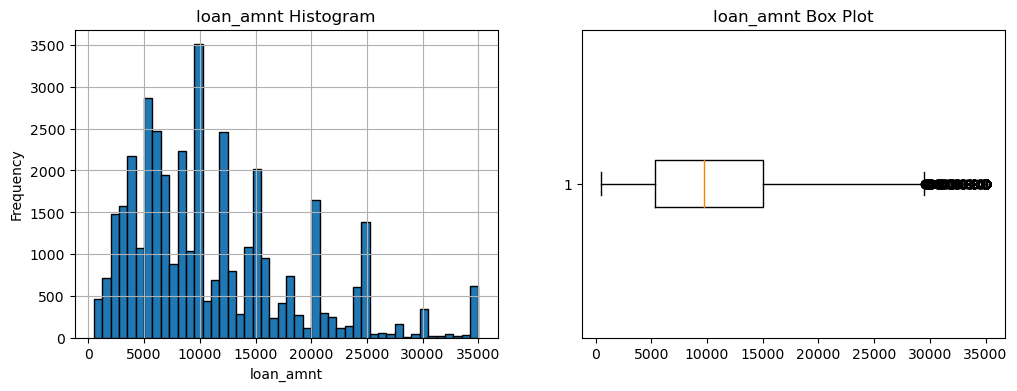

Skewness: 1.0751
Outliers: 1103 or 2.84%

--- Analysis for term ---
count    38770.000000
mean        41.988548
std         10.385818
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64


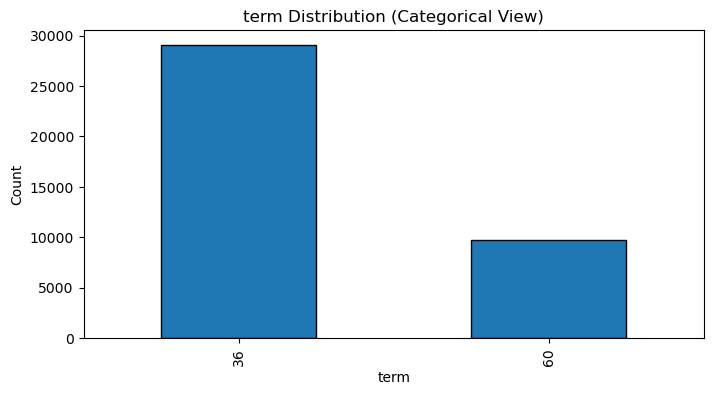


--- Analysis for int_rate ---
count    38770.000000
mean         0.119477
std          0.036979
min          0.054200
25%          0.089400
50%          0.117800
75%          0.144200
max          0.245900
Name: int_rate, dtype: float64


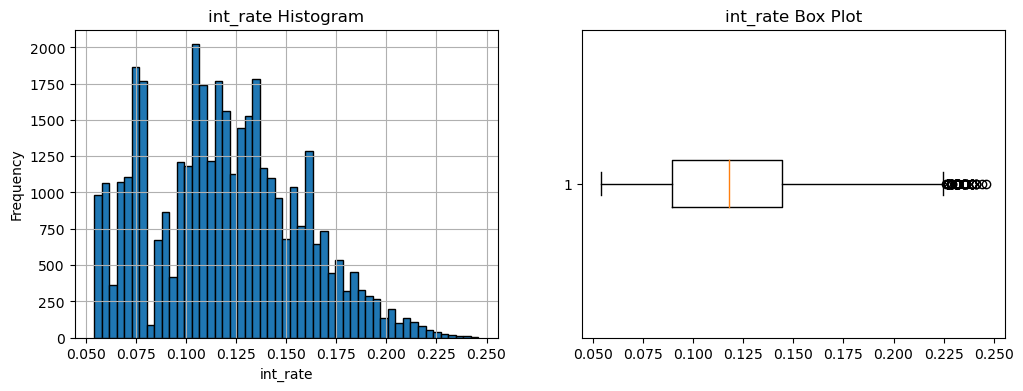

Skewness: 0.2936
Outliers: 67 or 0.17%

--- Analysis for grade ---
count     38770
unique        7
top           B
freq      11726
Name: grade, dtype: object


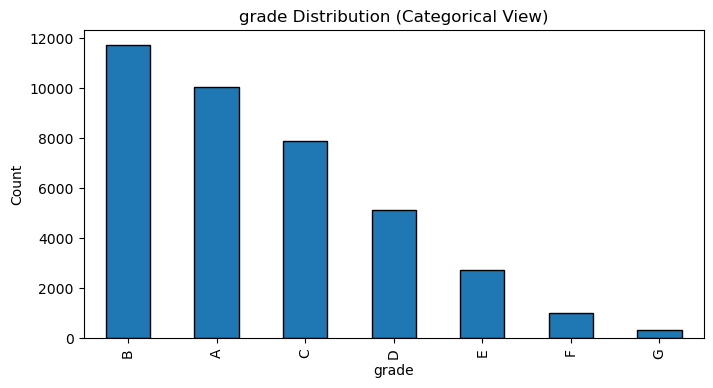


--- Analysis for sub_grade ---
count     38770
unique       35
top          A4
freq       2874
Name: sub_grade, dtype: object


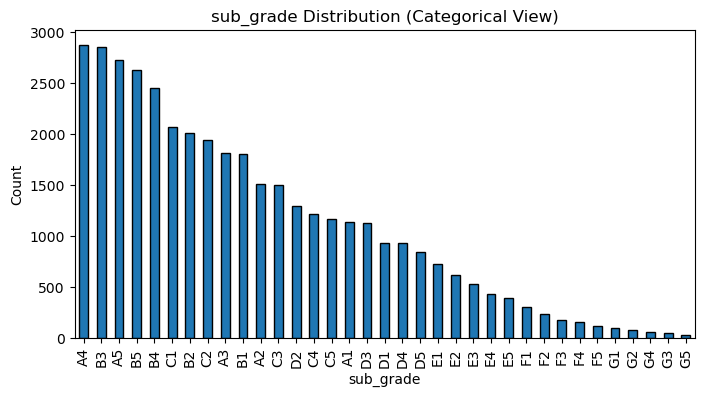


--- Analysis for emp_length ---
count    38770.000000
mean         5.079314
std          3.603362
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


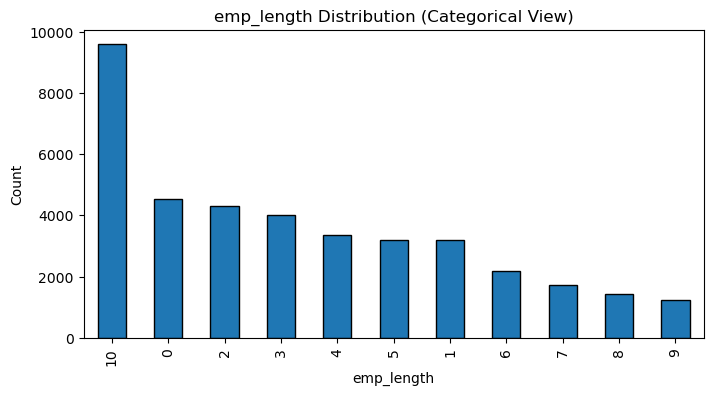


--- Analysis for home_ownership ---
count     38770
unique        5
top        RENT
freq      18550
Name: home_ownership, dtype: object


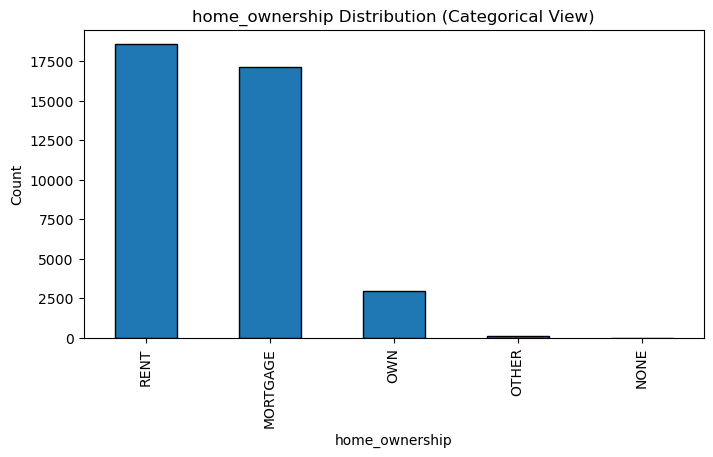


--- Analysis for annual_inc ---
count    3.877000e+04
mean     6.880025e+04
std      6.416132e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.892350e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


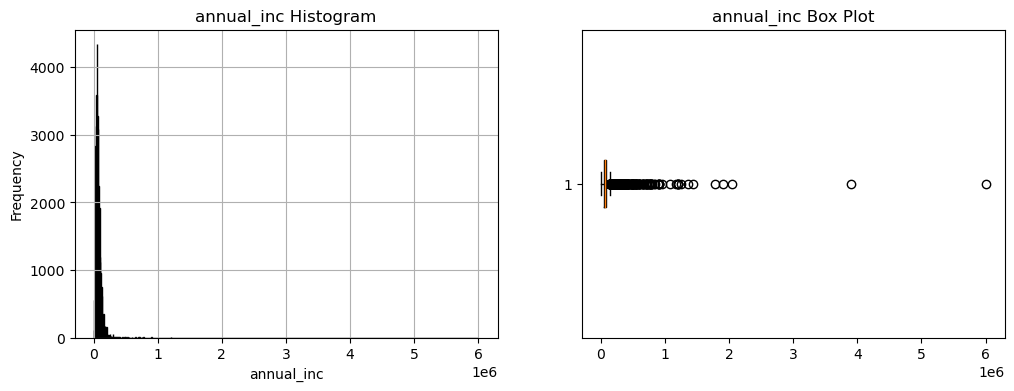

Skewness: 31.1346
Outliers: 1778 or 4.59%

--- Analysis for verification_status ---
count            38770
unique               3
top       Not Verified
freq             16732
Name: verification_status, dtype: object


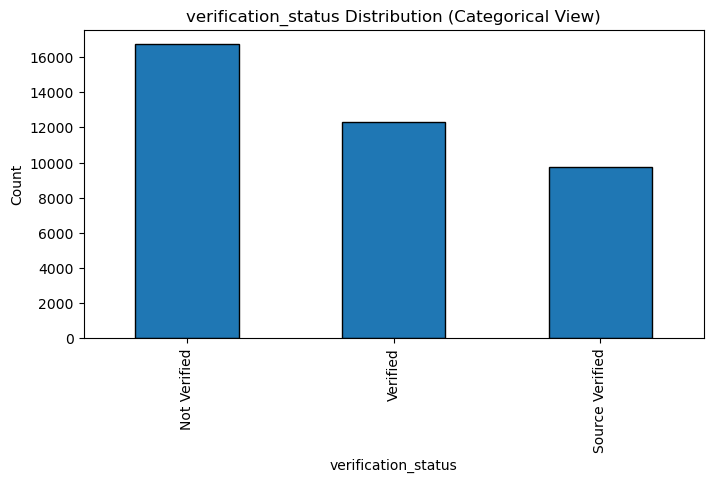


--- Analysis for purpose ---
count                  38770
unique                    14
top       debt_consolidation
freq                   18145
Name: purpose, dtype: object


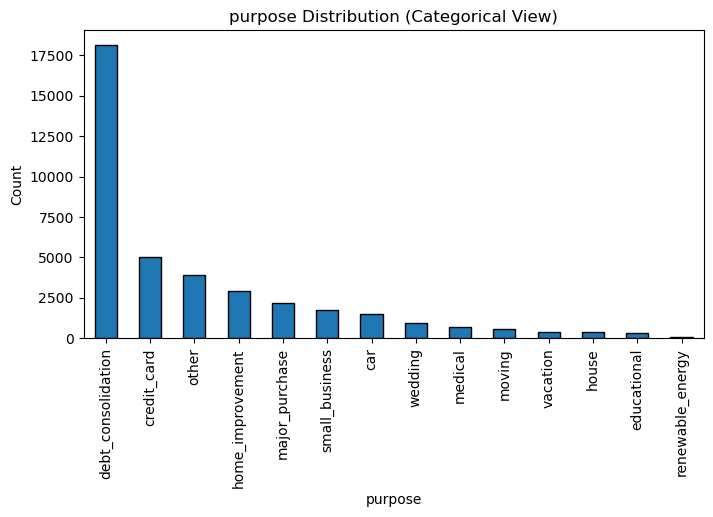


--- Analysis for dti ---
count    38770.000000
mean        13.276704
std          6.676355
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64


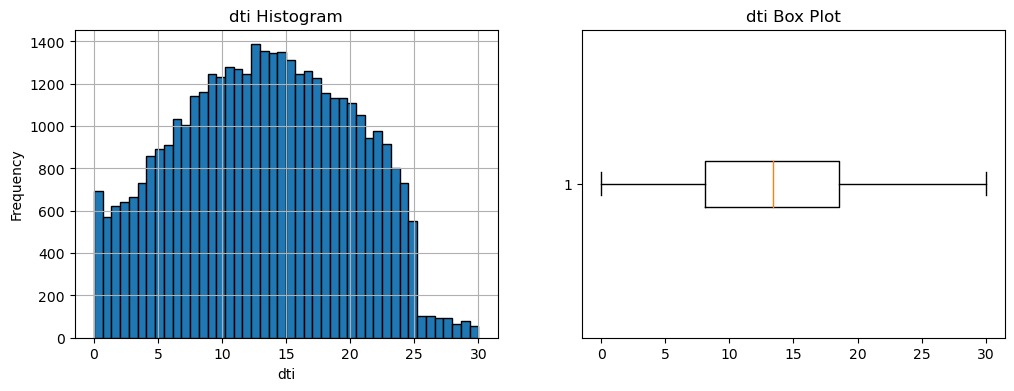

Skewness: -0.0266
Outliers: 0 or 0.0%

--- Analysis for delinq_2yrs ---
count    38770.000000
mean         0.146660
std          0.492197
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64


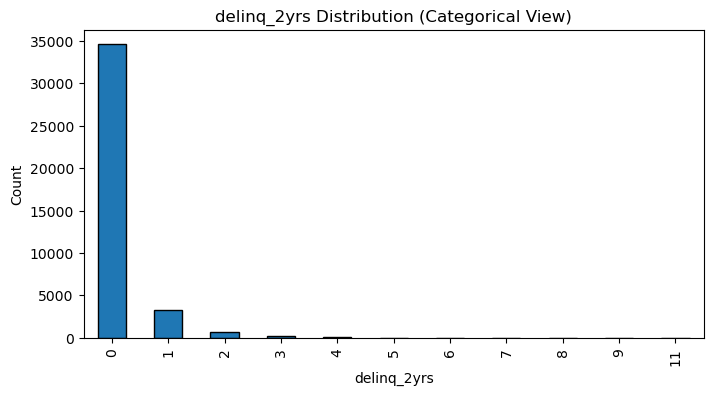


--- Analysis for inq_last_6mths ---
count    38770.000000
mean         0.871473
std          1.071444
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64


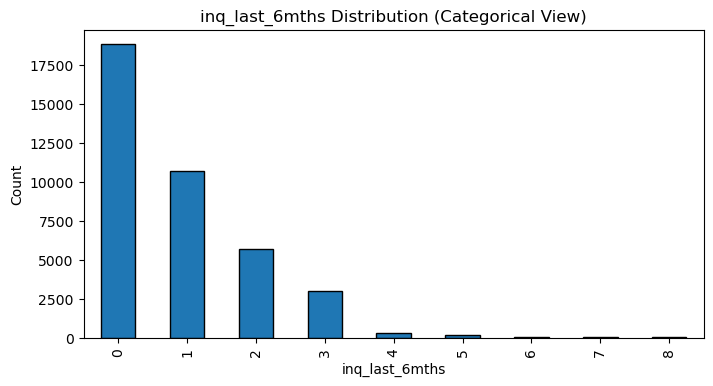


--- Analysis for open_acc ---
count    38770.000000
mean         9.278850
std          4.401871
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


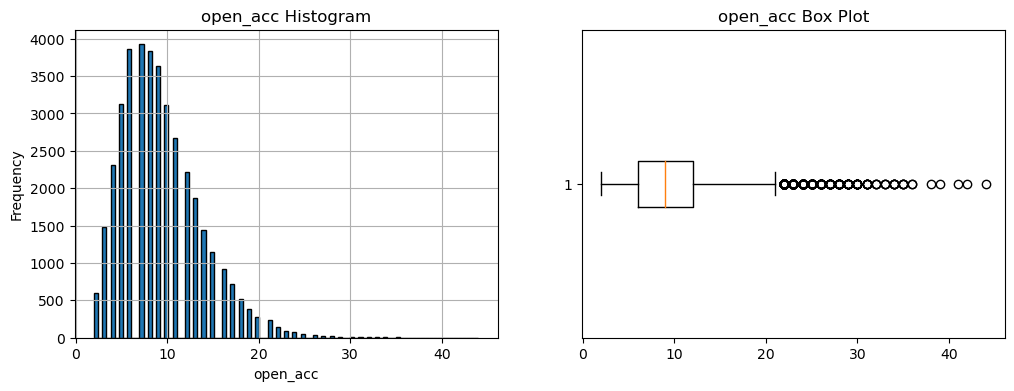

Skewness: 1.0063
Outliers: 499 or 1.29%

--- Analysis for pub_rec ---
count    38770.000000
mean         0.055404
std          0.237727
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64


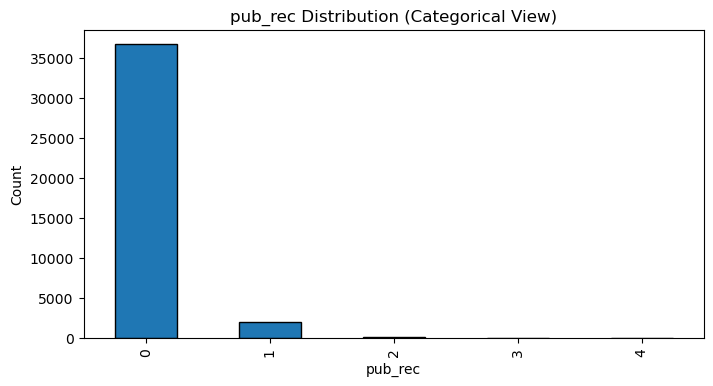


--- Analysis for revol_bal ---
count     38770.000000
mean      13297.262626
std       15861.575434
min           0.000000
25%        3654.000000
50%        8777.000000
75%       16938.000000
max      149588.000000
Name: revol_bal, dtype: float64


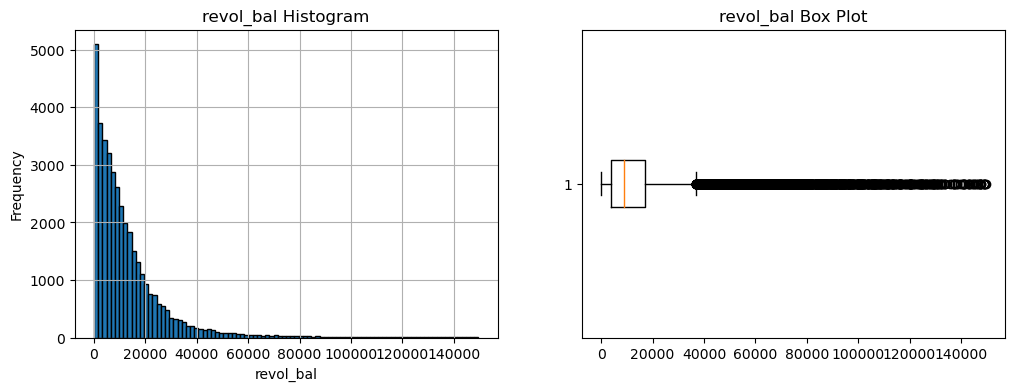

Skewness: 3.2102
Outliers: 2425 or 6.25%

--- Analysis for revol_util ---
count    38770.000000
mean         0.004865
std          0.002840
min          0.000000
25%          0.002510
50%          0.004910
75%          0.007220
max          0.009990
Name: revol_util, dtype: float64


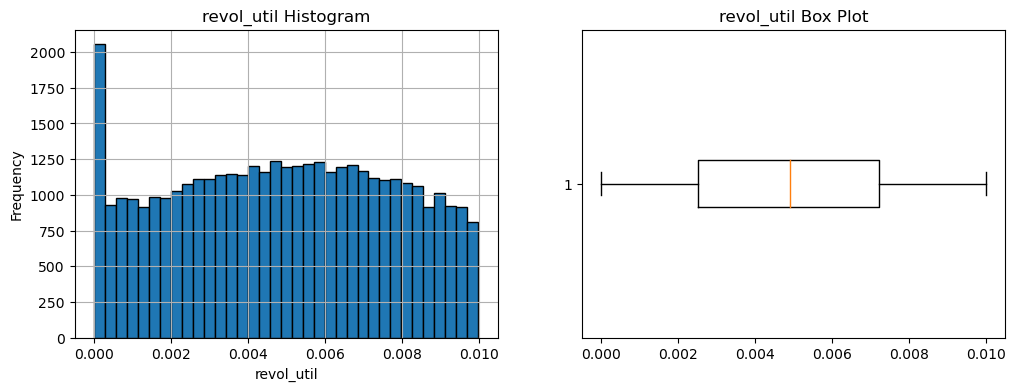

Skewness: -0.0279
Outliers: 0 or 0.0%

--- Analysis for total_acc ---
count    38770.000000
mean        22.059788
std         11.420556
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


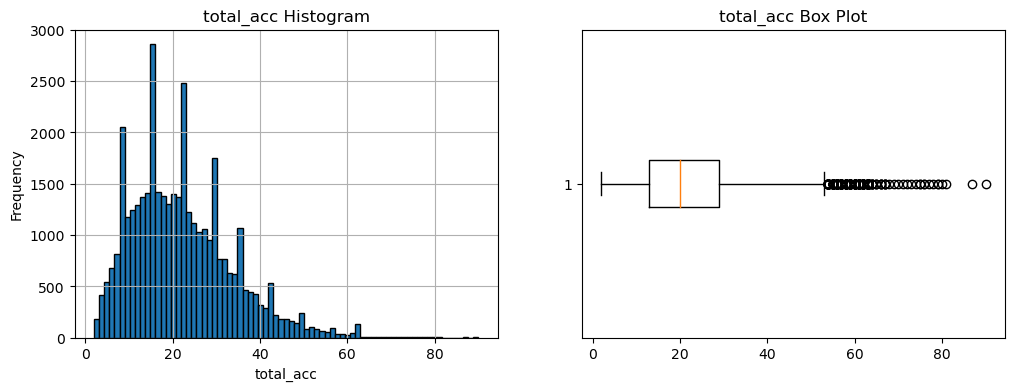

Skewness: 0.8313
Outliers: 515 or 1.33%

--- Analysis for loan_status ---
count          38770
unique             2
top       Fully Paid
freq           33136
Name: loan_status, dtype: object


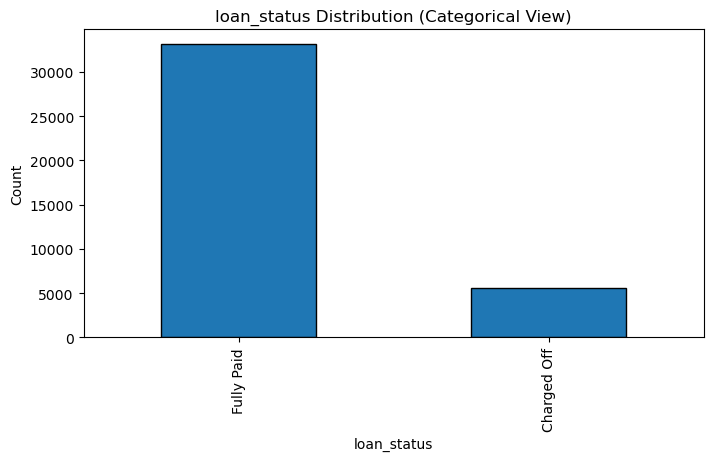

In [ ]:
## Write Code here

### Instead of just looking at the suggested features, I can loop through all of them
### and later zoom into whichever seem interesting.
### For practical purposes, it seems that 'term' would behave more like categorical (36 vs 60 months;
### short- vs long-term loan) than numerical, at least for plotting in univariate analysis
### (e.g., a box plot would not be informative). Same goes for all numerical categories that
### have very few values (like delinquencies, public records, and inquiries).
### I will define a threshold to plot these differently.

# Threshold for treating a numeric feature as categorical for plotting
threshold = 15

# Loop over all features and make appropriate plots for univariate analysis
for col in df.columns:
    print(f"\n--- Analysis for {col} ---")
    print(df[col].describe(include='all'))

    numtypes = ['int64', 'float64']
    # Check if the feature is numeric with very few values (<threshold) or categorical and make a bar plot;
    # otherwise, if numerical with lots of values, plot histogram and box plot, and calculate skewness, outliers
    if (df[col].dtype in numtypes and df[col].nunique() <= threshold) or (df[col].dtype not in numtypes):
        # For features with few unique values, plot a bar chart
        df[col].value_counts().plot(kind='bar', edgecolor='black', figsize=(8, 4))
        plt.title(f'{col} Distribution (Categorical View)')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    else:
        # For more continuous features, plot histogram and box plot
        plt.figure(figsize=(12, 4))

        #As before, I calculate the number of bins to use mathematically, from the data, instead of
        #picking a random value (big pet peeve). Use Scott's Rule
        bin_width_scott = 3.5 * np.std(df[col].dropna()) / len(df[col])**(1/3)
        nbins = int(np.ceil((df[col].max() - df[col].min()) / bin_width_scott))

        plt.subplot(1, 2, 1)
        df[col].hist(bins=nbins, edgecolor='black')
        plt.title(f'{col} Histogram')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        plt.boxplot(df[col].dropna(), vert=False)
        plt.title(f'{col} Box Plot')

        plt.show()

        # Also, print skewness and outlier count if desired
        print(f"Skewness: {df[col].skew():.4f}")
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))].shape[0]
        print(f"Outliers: {outlier_count} or {round((outlier_count/len(df[col]))*100,2)}%")


**Observations**

- Document your observations here

1) Most people pay their loans, few have derogatory public records, most have 0 inquirires and delinquencies; so the data is actually imbalanced, in favor of credit-worthy people.

2) None of the features seem Gaussian

3) Most people have ~9 accounts on average.

4) Most people use loans for debt consolidation

5) Some features show outliers, but not too many (revol_bal 6.25% outliers, 4.59% for annual income, and 2.84% for loan amount; all other are negligible).

6) Most people rent

7) Most common grade is B

8) Most common sub-grade is A4

9) Interestingly, there are 7 discrete spikes in total account numbers that are very common (I wonder why...???)

#### Bivariate Analysis

For the bivariate analysis, you can perform multiple analysis such as follows:

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

In [37]:
### I will "binary encode" loan_status here so that I can perform more comprehensive bivariate correlation 
### between it an other variables without getting metrics like min, max, mean, std, and interquartile ranges as NaN
### when I use df[[col, 'loan_status']].describe(include='all')) for all col != 'loan_status'
df['loan_status'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})


--- Bivariate Analysis: loan_amnt vs loan_status ---
          loan_amnt   loan_status
count  38770.000000  38770.000000
mean   11069.122388      0.854681
std     7362.292600      0.352426
min      500.000000      0.000000
25%     5325.000000      1.000000
50%     9737.500000      1.000000
75%    15000.000000      1.000000
max    35000.000000      1.000000
Correlation between loan_amnt and loan_status: -0.0585


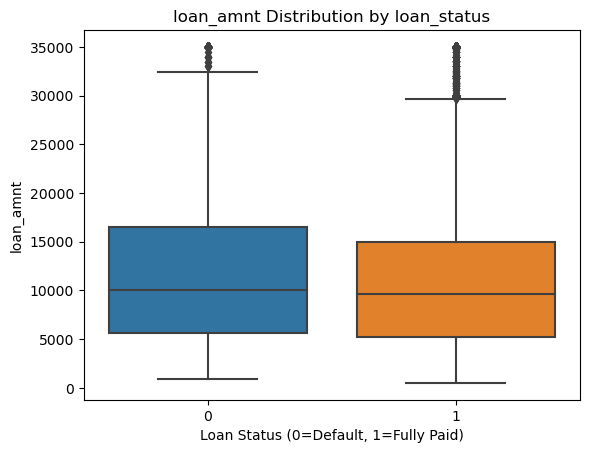


--- Bivariate Analysis: term vs loan_status ---
               term   loan_status
count  38770.000000  38770.000000
mean      41.988548      0.854681
std       10.385818      0.352426
min       36.000000      0.000000
25%       36.000000      1.000000
50%       36.000000      1.000000
75%       36.000000      1.000000
max       60.000000      1.000000
Default rate by term
term
36    0.110909
60    0.248811
Name: loan_status, dtype: float64


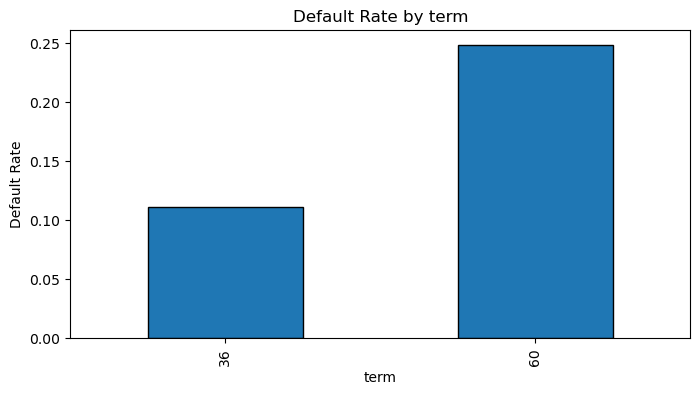


--- Bivariate Analysis: int_rate vs loan_status ---
           int_rate   loan_status
count  38770.000000  38770.000000
mean       0.119477      0.854681
std        0.036979      0.352426
min        0.054200      0.000000
25%        0.089400      1.000000
50%        0.117800      1.000000
75%        0.144200      1.000000
max        0.245900      1.000000
Correlation between int_rate and loan_status: -0.2092


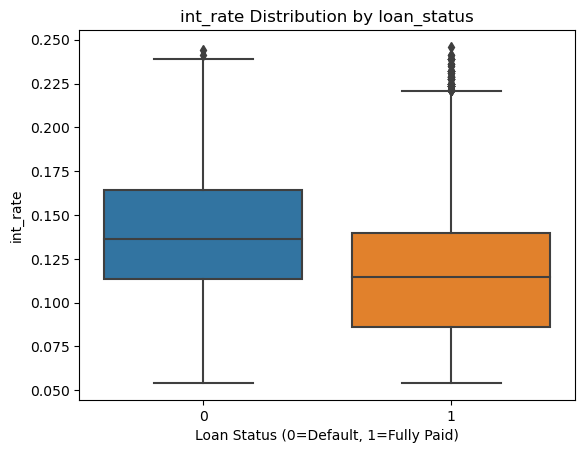


--- Bivariate Analysis: grade vs loan_status ---
        grade   loan_status
count   38770  38770.000000
unique      7           NaN
top         B           NaN
freq    11726           NaN
mean      NaN      0.854681
std       NaN      0.352426
min       NaN      0.000000
25%       NaN      1.000000
50%       NaN      1.000000
75%       NaN      1.000000
max       NaN      1.000000
Default rate by grade
grade
A    0.059889
B    0.121695
C    0.170961
D    0.218903
E    0.265283
F    0.322581
G    0.335548
Name: loan_status, dtype: float64


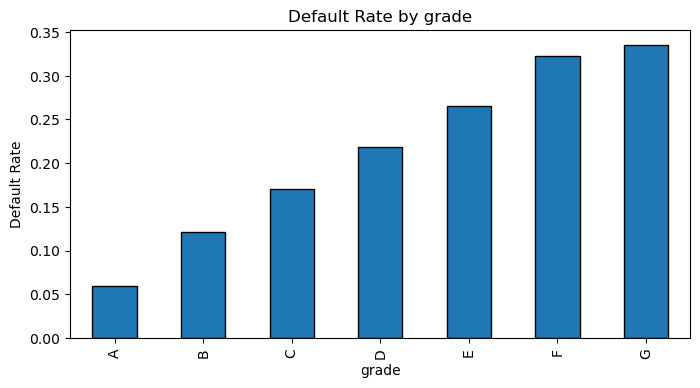


--- Bivariate Analysis: sub_grade vs loan_status ---
       sub_grade   loan_status
count      38770  38770.000000
unique        35           NaN
top           A4           NaN
freq        2874           NaN
mean         NaN      0.854681
std          NaN      0.352426
min          NaN      0.000000
25%          NaN      1.000000
50%          NaN      1.000000
75%          NaN      1.000000
max          NaN      1.000000
Default rate by sub_grade
sub_grade
A1    0.026339
A2    0.049072
A3    0.056906
A4    0.061935
A5    0.079750
B1    0.095000
B2    0.113546
B3    0.120520
B4    0.134450
B5    0.135619
C1    0.162633
C2    0.165464
C3    0.180481
C4    0.174486
C5    0.179002
D1    0.179377
D2    0.209266
D3    0.228039
D4    0.231681
D5    0.251190
E1    0.271605
E2    0.263328
E3    0.228571
E4    0.293023
E5    0.275253
F1    0.295455
F2    0.297071
F3    0.288136
F4    0.344156
F5    0.473684
G1    0.329787
G2    0.363636
G3    0.413043
G4    0.240741
G5    0.333333
Name: loan_st

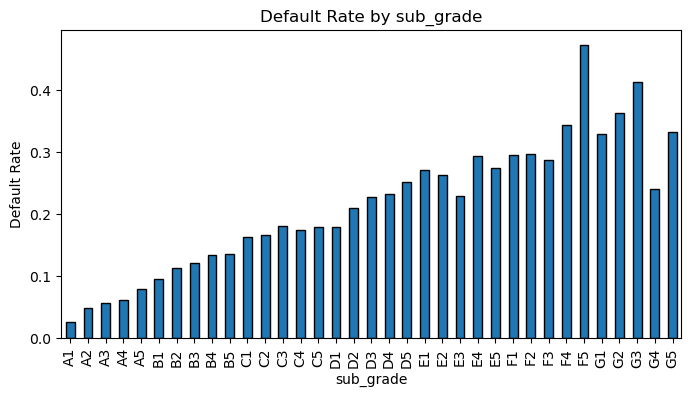


--- Bivariate Analysis: emp_length vs loan_status ---
         emp_length   loan_status
count  38770.000000  38770.000000
mean       5.079314      0.854681
std        3.603362      0.352426
min        0.000000      0.000000
25%        2.000000      1.000000
50%        4.000000      1.000000
75%        9.000000      1.000000
max       10.000000      1.000000
Default rate by emp_length
emp_length
0     0.141374
1     0.143261
2     0.132080
3     0.137854
4     0.137418
5     0.142724
6     0.140761
7     0.153085
8     0.141967
9     0.128560
10    0.162893
Name: loan_status, dtype: float64


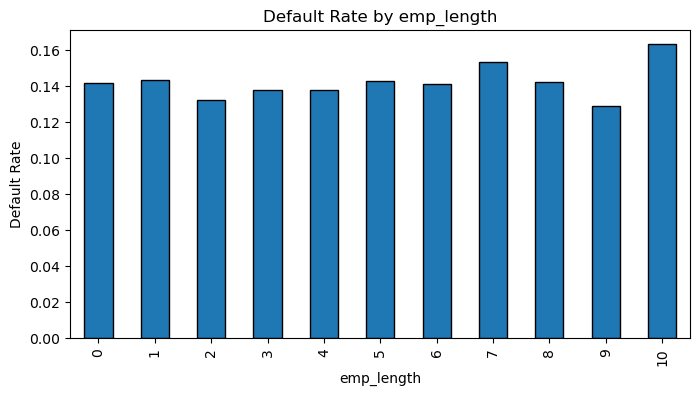


--- Bivariate Analysis: home_ownership vs loan_status ---
       home_ownership   loan_status
count           38770  38770.000000
unique              5           NaN
top              RENT           NaN
freq            18550           NaN
mean              NaN      0.854681
std               NaN      0.352426
min               NaN      0.000000
25%               NaN      1.000000
50%               NaN      1.000000
75%               NaN      1.000000
max               NaN      1.000000
Default rate by home_ownership
home_ownership
MORTGAGE    0.136043
NONE        0.000000
OTHER       0.183673
OWN         0.148396
RENT        0.153208
Name: loan_status, dtype: float64


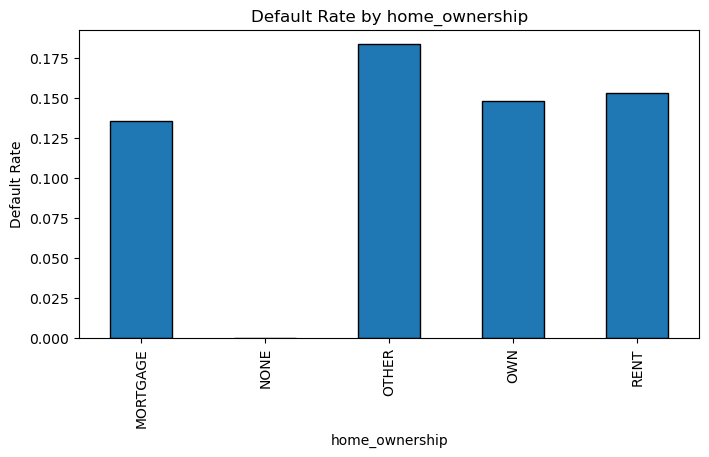


--- Bivariate Analysis: annual_inc vs loan_status ---
         annual_inc   loan_status
count  3.877000e+04  38770.000000
mean   6.880025e+04      0.854681
std    6.416132e+04      0.352426
min    4.000000e+03      0.000000
25%    4.000000e+04      1.000000
50%    5.892350e+04      1.000000
75%    8.200000e+04      1.000000
max    6.000000e+06      1.000000
Correlation between annual_inc and loan_status: 0.0409


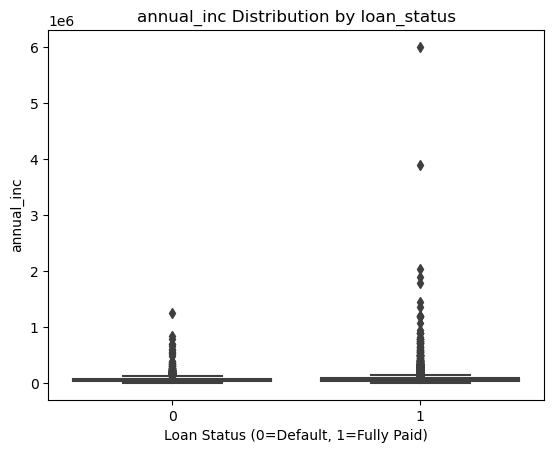


--- Bivariate Analysis: verification_status vs loan_status ---
       verification_status   loan_status
count                38770  38770.000000
unique                   3           NaN
top           Not Verified           NaN
freq                 16732           NaN
mean                   NaN      0.854681
std                    NaN      0.352426
min                    NaN      0.000000
25%                    NaN      1.000000
50%                    NaN      1.000000
75%                    NaN      1.000000
max                    NaN      1.000000
Default rate by verification_status
verification_status
Not Verified       0.128018
Source Verified    0.147479
Verified           0.167141
Name: loan_status, dtype: float64


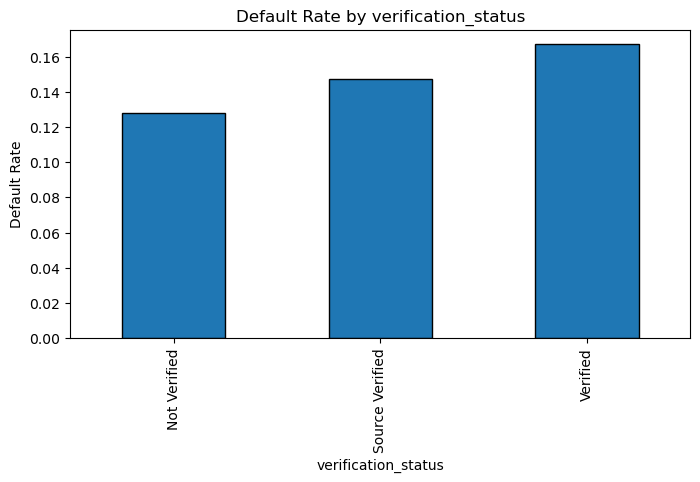


--- Bivariate Analysis: purpose vs loan_status ---
                   purpose   loan_status
count                38770  38770.000000
unique                  14           NaN
top     debt_consolidation           NaN
freq                 18145           NaN
mean                   NaN      0.854681
std                    NaN      0.352426
min                    NaN      0.000000
25%                    NaN      1.000000
50%                    NaN      1.000000
75%                    NaN      1.000000
max                    NaN      1.000000
Default rate by purpose
purpose
car                   0.105820
credit_card           0.107695
debt_consolidation    0.152769
educational           0.172308
home_improvement      0.119573
house                 0.159892
major_purchase        0.102730
medical               0.155425
moving                0.159170
other                 0.163144
renewable_energy      0.186275
small_business        0.269536
vacation              0.140957
wedding              

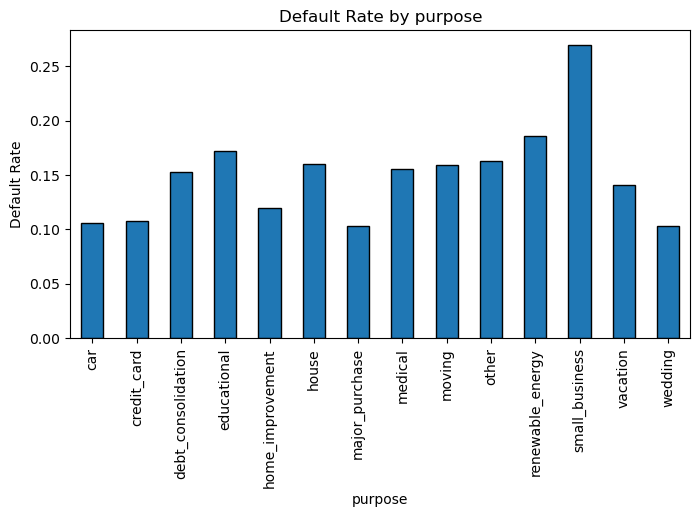


--- Bivariate Analysis: dti vs loan_status ---
                dti   loan_status
count  38770.000000  38770.000000
mean      13.276704      0.854681
std        6.676355      0.352426
min        0.000000      0.000000
25%        8.130000      1.000000
50%       13.370000      1.000000
75%       18.560000      1.000000
max       29.990000      1.000000
Correlation between dti and loan_status: -0.0448


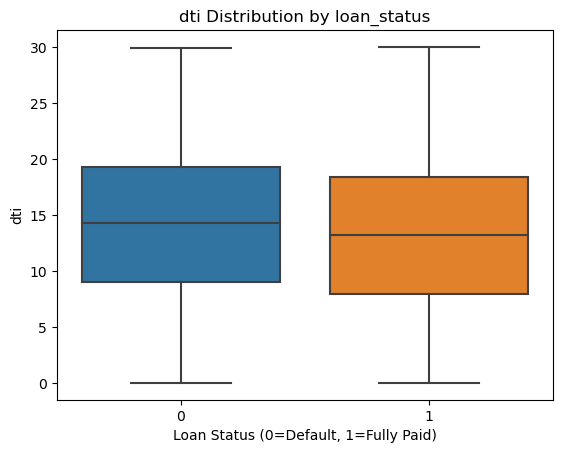


--- Bivariate Analysis: delinq_2yrs vs loan_status ---
        delinq_2yrs   loan_status
count  38770.000000  38770.000000
mean       0.146660      0.854681
std        0.492197      0.352426
min        0.000000      0.000000
25%        0.000000      1.000000
50%        0.000000      1.000000
75%        0.000000      1.000000
max       11.000000      1.000000
Default rate by delinq_2yrs
delinq_2yrs
0     0.142944
1     0.158025
2     0.192024
3     0.168224
4     0.216667
5     0.142857
6     0.100000
7     0.250000
8     0.500000
9     0.000000
11    0.000000
Name: loan_status, dtype: float64


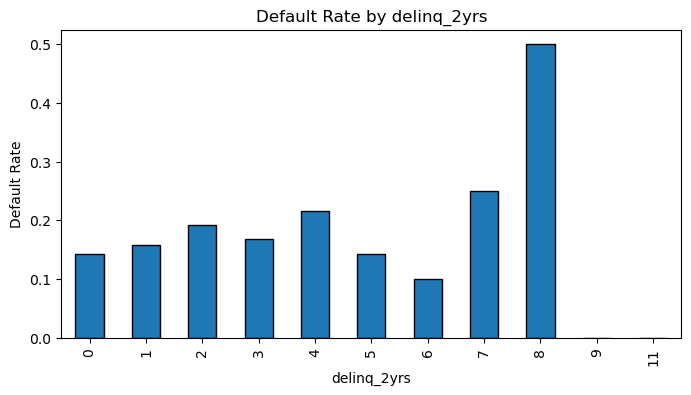


--- Bivariate Analysis: inq_last_6mths vs loan_status ---
       inq_last_6mths   loan_status
count    38770.000000  38770.000000
mean         0.871473      0.854681
std          1.071444      0.352426
min          0.000000      0.000000
25%          0.000000      1.000000
50%          1.000000      1.000000
75%          1.000000      1.000000
max          8.000000      1.000000
Default rate by inq_last_6mths
inq_last_6mths
0    0.121465
1    0.156793
2    0.165846
3    0.207012
4    0.159375
5    0.194444
6    0.253968
7    0.294118
8    0.214286
Name: loan_status, dtype: float64


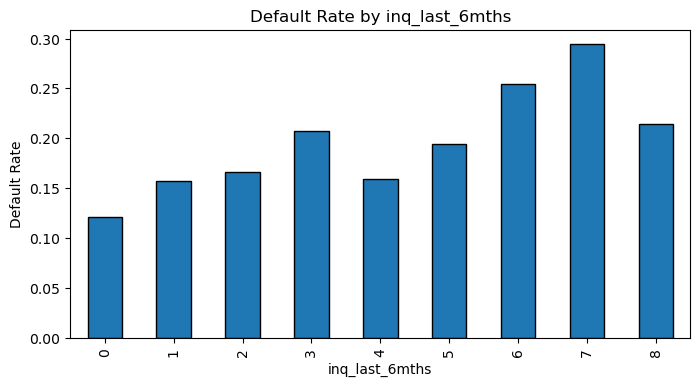


--- Bivariate Analysis: open_acc vs loan_status ---
           open_acc   loan_status
count  38770.000000  38770.000000
mean       9.278850      0.854681
std        4.401871      0.352426
min        2.000000      0.000000
25%        6.000000      1.000000
50%        9.000000      1.000000
75%       12.000000      1.000000
max       44.000000      1.000000
Correlation between open_acc and loan_status: 0.0094


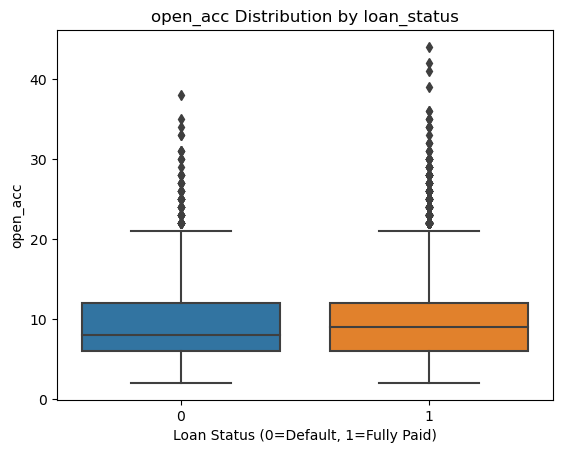


--- Bivariate Analysis: pub_rec vs loan_status ---
            pub_rec   loan_status
count  38770.000000  38770.000000
mean       0.055404      0.854681
std        0.237727      0.352426
min        0.000000      0.000000
25%        0.000000      1.000000
50%        0.000000      1.000000
75%        0.000000      1.000000
max        4.000000      1.000000
Default rate by pub_rec
pub_rec
0    0.140801
1    0.226396
2    0.208333
3    0.000000
4    0.000000
Name: loan_status, dtype: float64


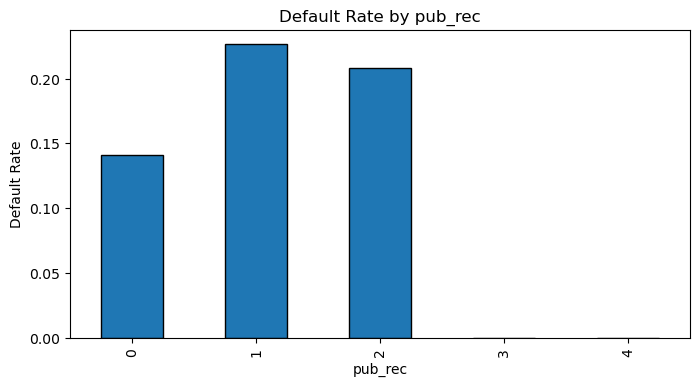


--- Bivariate Analysis: revol_bal vs loan_status ---
           revol_bal   loan_status
count   38770.000000  38770.000000
mean    13297.262626      0.854681
std     15861.575434      0.352426
min         0.000000      0.000000
25%      3654.000000      1.000000
50%      8777.000000      1.000000
75%     16938.000000      1.000000
max    149588.000000      1.000000
Correlation between revol_bal and loan_status: -0.0057


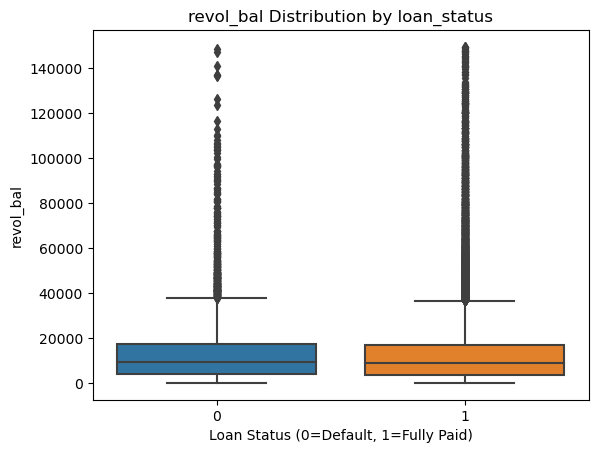


--- Bivariate Analysis: revol_util vs loan_status ---
         revol_util   loan_status
count  38770.000000  38770.000000
mean       0.004865      0.854681
std        0.002840      0.352426
min        0.000000      0.000000
25%        0.002510      1.000000
50%        0.004910      1.000000
75%        0.007220      1.000000
max        0.009990      1.000000
Correlation between revol_util and loan_status: -0.0986


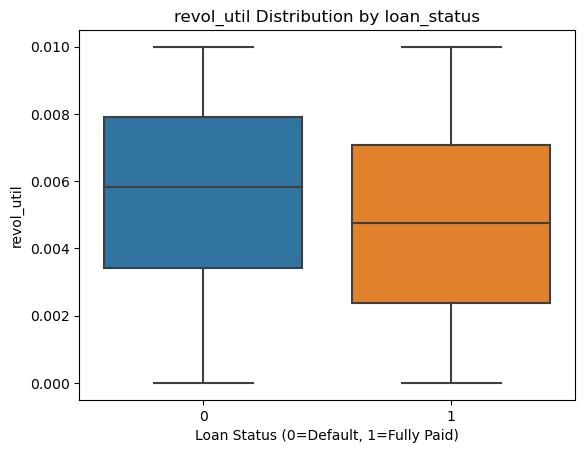


--- Bivariate Analysis: total_acc vs loan_status ---
          total_acc   loan_status
count  38770.000000  38770.000000
mean      22.059788      0.854681
std       11.420556      0.352426
min        2.000000      0.000000
25%       13.000000      1.000000
50%       20.000000      1.000000
75%       29.000000      1.000000
max       90.000000      1.000000
Correlation between total_acc and loan_status: 0.0227


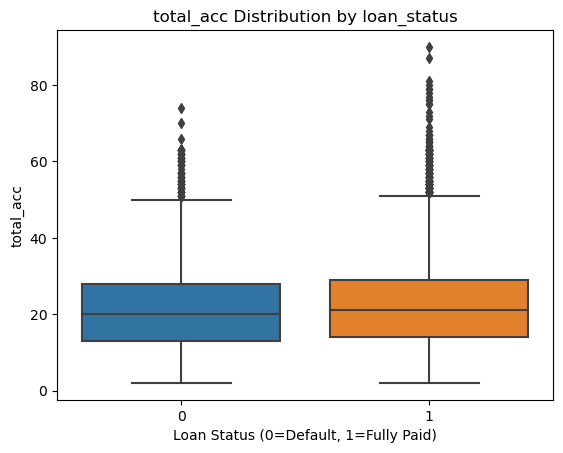

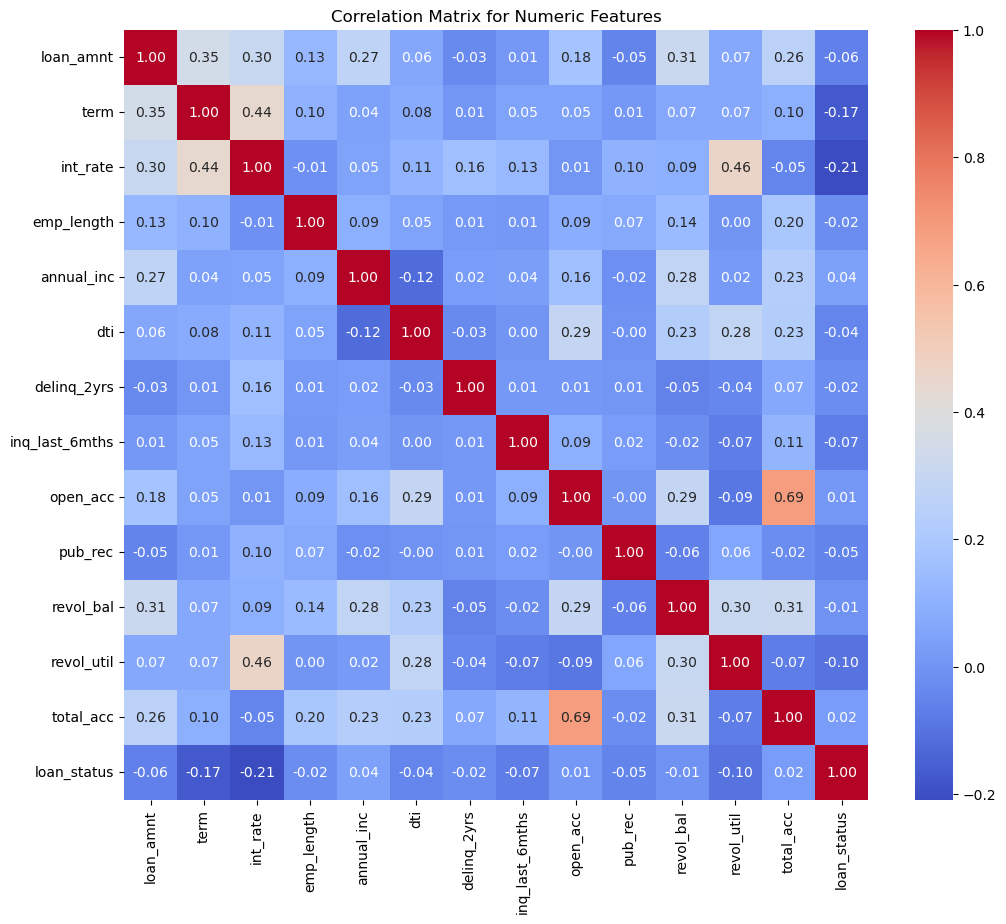

In [39]:
### Since this is a predictive modeling task, I'll define a target variable (loan_status), and analize it against each other
### individual feature to understand how each predictor relates to the outcome.

target = 'loan_status'

### I will again use a threshold for numeric features that have very few values, since they
### conceptually behave more like categorical features

threshold = 15  # If numeric feature has <=15 distinct values, treat it as categorical

# Loop through each feature except the target
for col in df.columns:
    if col == target:
        continue
    print(f"\n--- Bivariate Analysis: {col} vs {target} ---")
    print(df[[col, target]].describe(include='all'))

    # For numerical features with few unique values OR non-numeric features, treat as categorical
    if ((df[col].dtype in ['int64', 'float64'] and df[col].nunique() <= threshold) or
        (df[col].dtype not in ['int64', 'float64'])):
        # Compute default rate as the proportion where loan_status == "Charged Off"
        # To do this, I will first group the categories in each feature 'col' by the values of 'target'
        # (loan_status). Then I will apply the condition (x == 'Charged Off') to all members of each group
        # This will produce a series of False (0) and True (1) values, indicating whether each value per group
        # are "Charged Off" (defaulted) or not (paid in full). Taking the mean() within each group
        # will then reflect the proportion of entries per group that are "Charged Off".

        group = df.groupby(col)[target].apply(lambda x: (x == 0).mean())
        print("Default rate by", col)
        print(group)

        group.plot(kind='bar', edgecolor='black', figsize=(8, 4))
        plt.title(f"Default Rate by {col}")
        plt.xlabel(col)
        plt.ylabel("Default Rate")
        plt.show()
    else:
        # For continuous features, compute Pearson correlation with the target

        corr = df[col].corr(df[target])
        print(f"Correlation between {col} and {target}: {corr:.4f}")
        # Plot a box plot grouped by loan_status to see distribution differences
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f"{col} Distribution by {target}")
        plt.xlabel("Loan Status (0=Default, 1=Fully Paid)")
        plt.ylabel(col)
        plt.show()

# Additionally, compute and display a correlation matrix (heatmap) for all numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for Numeric Features")
plt.show()


# **My observations**

The bivariate analysis of the target feature (loan_status) against all other features reveals interesting insights that can guide encoding of categorical features and possibly the engineering of new features.

**1)** The distribution of **loan amounts** was slightly higher among defaulters, but the difference seems small (instead of box plots, one could run a t-test to measure p-value and effect size, to see how significant the difference is...; this applies for all features with a box plot distribution).

**2)** Longer **term** loans (60 months) have ~2.5x the default rate of shorter term loans (30 months)

**3)** People paying higher **interest** are more likely to default (***this was the strongest correlation with loan_status***, -2.092, rounded up in the heatmap to -2.1).

**4)** **Grade** monotonically increases with loan default, with the best grade, A, having the lowest default rate (~0.06), and the worst grade, G, having the highest default rate (0.33). This suggest that after one-hot encoding Grade, the lower grades may show high correlation with default status. *Perhaps **a new binary feature can be created**: “good grade” (1) vs “bad grade” (0), using the average default rate as a threshold to encode good vs bad grades, and this new feature may correlate more strongly with loan status*.

**5)** We see a similar effect of **subgrades** as for grade, and a similar rationale could be made for ***engineering new features based on subgrade*** using the average default rate by subgrade as a threshold. Interestingly, G3 and G2 have the highest default rates, not G4 and G5 (the worst subgrades).

**6)** **Employment length** seems irrelevant. Keep an eye on it to ***consider dropping it*** for efficiency?

**7)** **Home ownership** doesn’t seem to be relevant either, with “other” having only a slightly higher default rate compared to own, mortgage, and rent (“none” is empty). Keep an eye on it to ***consider dropping this feature*** too?

**8)** **Income** didn’t seem to correlate strongly with default rates either, though everyone who defaulted tended to have lower income (but this doesn’t mean that having a lower income increases the chance of default).

**9)** **Verification status** doesn’t seem very relevant either. Default rates differences across verification status are small. Keep an eye on it to ***consider dropping it***.

**10)** Analysis on **purpose** revealed that default rates are highest when loans are taken out for small business. Maybe we could ***engineer a binary feature*** based on "bad or high risk purpose" (0) and "good or low risk purpose" (1), using the average default rate as a threshold to encode the purposes.

**11)** The distribution of **dti** for defaulters was slightly higher than for non-defaulters (consider measuring significance).

**12)** Default rate seem significantly higher for people with 8 **delinquencies** compared to the others. This might also be used to **engineer a new binary feature** for “high” vs “low” delinquency, with 7 and 8 delinquencies being “high” and the others being “low”, as we can see that default rates are lowest for 6 delinquencies.

**13)** 7 and 6 **inquiries** yielded the highest default rates compared to the rest. Again, maybe engineer a new binary feature
 with “good” vs “bad” inquiry amount, with bad => 6 and good < 6.

**14)** Defaulters tended to have fewer open accounts and total accounts, and higher revol_util, but the differences did not seem too significant for either of these freatures (consider measuring significance) revol_bal doesn’t seem relevant at all.

**15)** Default rate is slightly higher among those having 1 o2 derogatory **public records**. Perhaps create a **new binary feature** combining 1 and 2 as “yes” vs 0 as “no” bad public records.

Here are my main observations from the heatmap correlation matrix:

**16)** From the heatmap, there are no strong correlations between any variables. The strongest are 0.69 between total_acc and open_acc, 0.46 between int_rate and revl_util, and 0.44 between int_rate and term. All others are weaker.

**17)** The strongest correlation for the target, loan_status, is -0.21 with int_rate.


#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- handle class imbalance
- train-test split
- scaling

##### Encoding variables

In [40]:
### I will check for candidate features to one-hot-encode or binary-encode
for col in df.columns:
    print(f"\n{col}")
    print("Unique count:", df[col].nunique())
    print("Unique values:", df[col].unique())


loan_amnt
Unique count: 870
Unique values: [ 5000.  2500.  2400. 10000.  7000.  3000.  5600.  5375.  6500. 12000.
  9000.  1000.  3600.  6000.  9200. 20250. 21000. 15000.  4000.  8500.
  4375. 31825. 12400. 10800.  9600.  4400. 14000. 11000. 25600. 16000.
  7100. 13000. 17500. 17675.  8000.  3500. 12500. 16425.  8200. 20975.
  6400. 14400.  7250. 18000. 35000. 11800.  4500. 10500. 20000.  6200.
  7200.  9500. 18825. 24000.  2100.  5500. 26800. 25000. 19750. 13650.
 28000. 10625.  8850.  6375. 11100.  4200.  8875. 13500. 21600.  8450.
 13475. 22000.  7325.  7750. 13350. 22475.  8400. 13250.  7350. 11500.
 29500.  2000. 11625. 15075.  5300.  8650.  7400. 24250. 26000.  1500.
 19600.  4225. 16500. 15600. 14125. 13200.  1400.  3200. 11875.  1800.
 23200.  4800.  7300. 10400.  6600. 30000.  4475.  6300.  8250.  9875.
 21500.  7800.  9750. 15550.  7500.  5800.  8050.  5400.  4125.  9800.
 15700.  9900.  6250. 10200. 23000. 21250. 33425.  8125. 18800. 19200.
 12875.  2625. 11300.  4100. 1822

#**CHECK FOR IMBALANCE**

In [41]:
### I will check for class imbalance between paid and defaulted loans
df['loan_status'].value_counts()

1    33136
0     5634
Name: loan_status, dtype: int64

In [42]:
### Based on results from bivariate analysis, I will apply the encoding strategy
### (and potentially feature dropping strategy) in the text box below

## **MY ENCODING AND FEATURE ENGINEERING STRATEGY**
**1)**	**Run parametric test (such as t-test) for continuous variables** to distinguish whether the differences in distributions between defaulters and non-defaulters are significant. If not significant, I may **consider dropping these features** to simplify the data frame. This applies to loan_amnt, int_rate, annual_inc, dti, open_acc, revol_bal, revol_util, total_acc

**2)**	One-hot-encoding all categorical features, particularly those with many values, might bloat up the data frame (I'll try small tests with this). Thus, I will **use binary encoding** of many features, in case these are more informative and allow to keep the data frame more compact:

  **2.1.**	Calculate average default rate across **grades** and use this value as a threshold to engineer a **new feature “grade_qual”** where grade is encoded as  0 (“bad”) if grade > threshold and 1 (“good”) if grade < threshold.
  
  **2.2.**	Calculate average default rate across **subgrades** and use this value as a threshold to engineer a **new feature “subgrade_qual”** where subgrade is encoded as  0 (“bad”) if subgrade > threshold and 1 (“good”) if subgrade < threshold.

  **2.3.**	Calculate average default rate across **purpose** and use this value as a threshold to engineer a **new feature “purpose_qual”** as  0 (“bad”) if grade > threshold and 1 (“good”) if grade < threshold.
  
  **2.4.**	Engineer a **new feature “delinq_qual”** with 0 >= 7 and 1 <= 6

  **2.5.**	Engineer a **new feature “inq_qual”** with 0 >= 6 and 1 <  6.	Engineer a new feature “pub_rec_binary” with 0 for those who don’t have pub_rec, and 1 for those who do (whether it’s 1 or 2 records)

**3)**	Keep an eye on 'emp_length', 'home_ownership', and 'verification_status', as potential features to be dropped, as these don’t seem to show significant differences in default rate across values from bivariate analysis (pending further tests of multivariate analysis, colinearty, etc; or they may be dropped naturally if I use LASSO penalty later).

In [43]:
### Test for the significance of continous numerical features that showed low correlation with loan status

import scipy.stats as stats

# Function to compute Cohen's d for two groups (for parametric tests)
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

def analyze_feature_ttest(feature, df, target='loan_status'):
    # Assume df[target] is already encoded as binary: 1 for "Fully Paid", 0 for "Charged Off"
    group_good = df[df[target] == 1][feature]
    group_bad = df[df[target] == 0][feature]

    print(f"--- Analysis for {feature} ---")

    # 1. Normality testing using Shapiro-Wilk
    stat_good, p_good = stats.shapiro(group_good)
    stat_bad, p_bad = stats.shapiro(group_bad)
    normal_good = p_good > 0.05
    normal_bad = p_bad > 0.05
    print(f"Shapiro-Wilk test for {feature}:")
    print(f"  Group (loan_status==1): p = {p_good:.4f} -> {'Normal' if normal_good else 'Not normal'}")
    print(f"  Group (loan_status==0): p = {p_bad:.4f} -> {'Normal' if normal_bad else 'Not normal'}")

    # 2. Test for equal variances using Levene's test
    stat_levene, p_levene = stats.levene(group_good, group_bad)
    equal_var = p_levene > 0.05
    print(f"Levene's test for equal variances: p = {p_levene:.4f} -> {'Equal variances' if equal_var else 'Unequal variances'}")

    # 3. Choose the appropriate test based on normality
    if normal_good and normal_bad:
        # Use parametric t-test
        t_stat, p_val = stats.ttest_ind(group_good, group_bad, equal_var=equal_var)
        test_used = "t-test"
        # Compute effect size only for parametric test
        d = cohen_d(group_good, group_bad)
        print(f"{test_used} results for {feature}:")
        print(f"  t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
        print(f"  Cohen's d: {d:.4f}")
        abs_d = abs(d)
        if abs_d < 0.2:
            effect = "negligible"
        elif abs_d < 0.5:
            effect = "small"
        elif abs_d < 0.8:
            effect = "medium"
        else:
            effect = "large"
        print(f"  Effect size is {effect}.")
    else:
        # Use non-parametric Mann-Whitney U test
        u_stat, p_val = stats.mannwhitneyu(group_good, group_bad, alternative='two-sided')
        test_used = "Mann-Whitney U test"
        # Compute effect size r = |Z|/sqrt(N)
        n1 = len(group_good)
        n2 = len(group_bad)
        mu_U = n1 * n2 / 2.0
        sigma_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12.0)
        z = (u_stat - mu_U) / sigma_U
        N = n1 + n2
        r = abs(z) / np.sqrt(N)

        print(f"{test_used} results for {feature}:")
        print(f"  U-statistic: {u_stat:.4f}, p-value: {p_val:.4f}")
        print(f"  Effect size r: {r:.4f}")
        # Interpret r using common thresholds (these can be adjusted)
        if r < 0.1:
            effect = "negligible"
        elif r < 0.3:
            effect = "small"
        elif r < 0.5:
            effect = "medium"
        else:
            effect = "large"
        print(f"  Effect size is {effect}.")

    # 5. Final interpretation & suggestion
    if p_val < 0.05:
        print(f"Difference in {feature} between groups is statistically significant.")
    else:
        print(f"No statistically significant difference in {feature} between groups.")
        print(f"Consider whether {feature} contributes meaningfully; if not, it might be dropped from the model.")

    print("\n")

features_to_test = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']
for feature in features_to_test:
    analyze_feature_ttest(feature, df, target='loan_status')




--- Analysis for loan_amnt ---
Shapiro-Wilk test for loan_amnt:
  Group (loan_status==1): p = 0.0000 -> Not normal
  Group (loan_status==0): p = 0.0000 -> Not normal
Levene's test for equal variances: p = 0.0000 -> Unequal variances
Mann-Whitney U test results for loan_amnt:
  U-statistic: 86194155.5000, p-value: 0.0000
  Effect size r: 0.0468
  Effect size is negligible.
Difference in loan_amnt between groups is statistically significant.


--- Analysis for int_rate ---
Shapiro-Wilk test for int_rate:
  Group (loan_status==1): p = 0.0000 -> Not normal
  Group (loan_status==0): p = 0.0000 -> Not normal
Levene's test for equal variances: p = 0.6834 -> Equal variances
Mann-Whitney U test results for int_rate:
  U-statistic: 62535725.5000, p-value: 0.0000
  Effect size r: 0.2015
  Effect size is small.
Difference in int_rate between groups is statistically significant.


--- Analysis for annual_inc ---
Shapiro-Wilk test for annual_inc:
  Group (loan_status==1): p = 0.0000 -> Not normal
  

/Users/jgalaz/miniconda3/envs/e2/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


--- Analysis for open_acc ---
Shapiro-Wilk test for open_acc:
  Group (loan_status==1): p = 0.0000 -> Not normal
  Group (loan_status==0): p = 0.0000 -> Not normal
Levene's test for equal variances: p = 0.0414 -> Unequal variances
Mann-Whitney U test results for open_acc:
  U-statistic: 95250058.0000, p-value: 0.0138
  Effect size r: 0.0125
  Effect size is negligible.
Difference in open_acc between groups is statistically significant.


--- Analysis for revol_bal ---
Shapiro-Wilk test for revol_bal:
  Group (loan_status==1): p = 0.0000 -> Not normal
  Group (loan_status==0): p = 0.0000 -> Not normal
Levene's test for equal variances: p = 0.8026 -> Equal variances
Mann-Whitney U test results for revol_bal:
  U-statistic: 90636677.0000, p-value: 0.0005
  Effect size r: 0.0177
  Effect size is negligible.
Difference in revol_bal between groups is statistically significant.


--- Analysis for revol_util ---
Shapiro-Wilk test for revol_util:
  Group (loan_status==1): p = 0.0000 -> Not norm

#**NEW FEATURE ENGINEERING**

In [45]:
### Based on the parametric tests above to compare the dstributions of
### loan_amnt, int_rate, annual_inc, dti, open_acc, revol_bal, revol_util, total_acc between defaulters and non-defaulters,
### all have significant p-values (differences are not random), but effect size is negligible... suggesting differences may be irrelevant.
### It's unclear whether to drop them at this point; but even if they may be weak individual predictors, they may contribute
### productively to classification as a whole (multivariate analysis might clarify?).
### Thus, I will proceed to engineer new binary features.

# Create a copy of the DataFrame for encoding and analysis
df_encoded = df.copy()

### ENGINEER NEW FEATURE GRADE_QUAL
# Compute fully paid rate per grade (since loan_status is 1 for Fully Paid)
grade_payment_rate = df_encoded.groupby('grade')['loan_status'].mean()

# Choose a threshold, e.g., the overall average fully paid rate across grades
threshold_grade = grade_payment_rate.mean()
print("Grade Payment Rates:\n", grade_payment_rate)
print("Threshold for grade payment rate:", threshold_grade)

# Engineer binary feature: 1 if fully paid rate for that grade is at or above threshold ("good"), 0 otherwise ("bad")
df_encoded['grade_qual'] = df_encoded['grade'].map(lambda x: 1 if grade_payment_rate.loc[x] >= threshold_grade else 0)


### ENGINEER NEW FEATURE SUBGRADE_QUAL
# Compute fully paid rate per sub_grade
subgrade_payment_rate = df_encoded.groupby('sub_grade')['loan_status'].mean()
threshold_subgrade = subgrade_payment_rate.mean()
print("Subgrade Payment Rates:\n", subgrade_payment_rate)
print("Threshold for subgrade payment rate:", threshold_subgrade)

# Engineer binary feature for subgrade quality
df_encoded['subgrade_qual'] = df_encoded['sub_grade'].map(lambda x: 1 if subgrade_payment_rate.loc[x] >= threshold_subgrade else 0)


### ENGINEER NEW FEATURE PURPOSE_QUAL
# Compute fully paid rate per purpose
purpose_payment_rate = df_encoded.groupby('purpose')['loan_status'].mean()
threshold_purpose = purpose_payment_rate.mean()
print("Purpose Payment Rates:\n", purpose_payment_rate)
print("Threshold for purpose payment rate:", threshold_purpose)

# Engineer binary feature for purpose quality (1 = "good", 0 = "bad")
df_encoded['purpose_qual'] = df_encoded['purpose'].map(lambda x: 1 if purpose_payment_rate.loc[x] >= threshold_purpose else 0)


### ENGINEER NEW FEATURE DELINQ_QUAL
df_encoded['delinq_qual'] = df_encoded['delinq_2yrs'].apply(lambda x: 1 if x <= 6 else 0)

### ENGINEER NEW FEATURE INQ_QUAL
df_encoded['inq_qual'] = df_encoded['inq_last_6mths'].apply(lambda x: 1 if x < 6 else 0)

### ENGINEER NEW FEATURE PUB_REC_BINARY
df_encoded['pub_rec_binary'] = df_encoded['pub_rec'].apply(lambda x: 0 if x == 0 else 1)





Grade Payment Rates:
 grade
A    0.940111
B    0.878305
C    0.829039
D    0.781097
E    0.734717
F    0.677419
G    0.664452
Name: loan_status, dtype: float64
Threshold for grade payment rate: 0.786448635238771
Subgrade Payment Rates:
 sub_grade
A1    0.973661
A2    0.950928
A3    0.943094
A4    0.938065
A5    0.920250
B1    0.905000
B2    0.886454
B3    0.879480
B4    0.865550
B5    0.864381
C1    0.837367
C2    0.834536
C3    0.819519
C4    0.825514
C5    0.820998
D1    0.820623
D2    0.790734
D3    0.771961
D4    0.768319
D5    0.748810
E1    0.728395
E2    0.736672
E3    0.771429
E4    0.706977
E5    0.724747
F1    0.704545
F2    0.702929
F3    0.711864
F4    0.655844
F5    0.526316
G1    0.670213
G2    0.636364
G3    0.586957
G4    0.759259
G5    0.666667
Name: loan_status, dtype: float64
Threshold for subgrade payment rate: 0.784412037772088
Purpose Payment Rates:
 purpose
car                   0.894180
credit_card           0.892305
debt_consolidation    0.847231
educational   

In [46]:
# For the binary variable 'term', I will use label encoding (in this case binary encoding)
df_encoded['term'] = df_encoded['term'].map({36: 0, 60: 1})

# For all other nominal categorical variables, I will use one-hot encoding and drop the original columns
# This will greatly inflate the data frame...
df_encoded = pd.get_dummies(df_encoded, columns=['home_ownership', 'verification_status', 'purpose', 'grade', 'sub_grade'], drop_first=True)

#**Handling Class Imbalance**

Suggestion - Perform SMOTE here

In [47]:
### Make sure the data frame is "clean" and contains only non-null, numerical values
print(df_encoded.isnull().sum())
print(df_encoded.dtypes)
obj_cols = df_encoded.select_dtypes(include=['object']).columns
print("Object columns:", obj_cols.tolist())
mask_inf = np.isinf(df_encoded).any(axis=1)
print("Number of rows with inf or -inf:", mask_inf.sum())

loan_amnt       0
term            0
int_rate        0
emp_length      0
annual_inc      0
               ..
sub_grade_G1    0
sub_grade_G2    0
sub_grade_G3    0
sub_grade_G4    0
sub_grade_G5    0
Length: 79, dtype: int64
loan_amnt       float64
term              int64
int_rate        float64
emp_length        int64
annual_inc      float64
                 ...   
sub_grade_G1      uint8
sub_grade_G2      uint8
sub_grade_G3      uint8
sub_grade_G4      uint8
sub_grade_G5      uint8
Length: 79, dtype: object
Object columns: []
Number of rows with inf or -inf: 0


In [53]:
from imblearn.over_sampling import SMOTE


In [54]:
# Separate features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

for col in X.columns:
    na_count = X[col].isnull().sum()
    if na_count > 0:
        print(f"Column '{col}' has {na_count} missing values.")

#print("NaNs in y:", y.isnull().sum())
#print("Unique values in y:", y.unique())
#print("y dtype:", y.dtype)


In [55]:
# Instantiate SMOTE and perform oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)


Original dataset shape: (38770, 78) (38770,)
Resampled dataset shape: (66272, 78) (66272,)


In [56]:
## Check the distribution of class in the newly resampled data
y_resampled.value_counts()


1    33136
0    33136
Name: loan_status, dtype: int64

#**Train-test split**

Now that we have handled class imbalance, let's perform the train-test split. We have to do a few additional imports

In [57]:
# Splitting our dataset between training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [58]:
## Check the samples
X_train[:5]

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
19279,17000.000000,0,0.076600,5,42000.000000,23.310000,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
42077,2748.954424,0,0.120707,5,40531.102771,14.856685,0,1,6,0,...,0,0,0,0,0,0,0,0,0,0
18364,16000.000000,0,0.164000,4,110000.000000,14.970000,1,0,14,0,...,0,0,0,0,0,0,0,0,0,0
64706,22632.261572,1,0.155350,8,30221.143483,14.866543,0,5,8,0,...,0,0,0,0,0,0,0,0,0,0
25902,5000.000000,0,0.078800,5,75000.000000,12.830000,0,0,14,0,...,0,0,0,0,0,0,0,0,0,0


**Scaling**

In [59]:
from sklearn.preprocessing import MinMaxScaler
# Write code for MinMax Scaler

# Copy the features, initialize scaler, fit and transform the data
X_scaled = X.copy()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_scaled)

# Convert the scaled data back to a DataFrame with original column names, for convenience downstream (in case we want to access features by name)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#print(X_scaled.head(5))


In [60]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)


### Model Building and Model Evaluation

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.
- Select the best possible model that you will be using for classfication

Let's start off with the simplest model -
#Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [62]:
## Build the model

# Initialize the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train (fit) the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

## Check its evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy}\nPrecision={precision}\nRecall={recall}\nF1_score={f1}")

# Predict probabilities for ROC-AUC
y_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")


Accuracy: 0.5651452282157676
Precision=0.5599225844871222
Recall=0.572537676967575
F1_score=0.5661598675297306
ROC-AUC: 0.5933984928256693


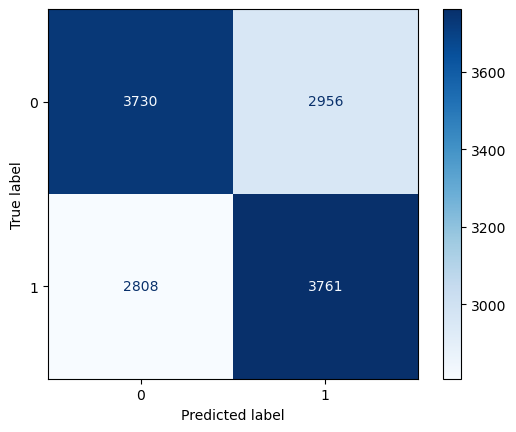

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [64]:
from sklearn.metrics import classification_report
## Plot the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56      6686
           1       0.56      0.57      0.57      6569

    accuracy                           0.57     13255
   macro avg       0.57      0.57      0.57     13255
weighted avg       0.57      0.57      0.57     13255



###Let's try PCA to see if dropping weaker features improves things


In [65]:

from sklearn.decomposition import PCA

# Fit PCA on the training set
pca = PCA(n_components=0.95, random_state=42)
X_train_p = pca.fit_transform(X_train)

# Transform the test set using the same PCA
X_test_p = pca.transform(X_test)

print("Shape of PCA-reduced Training Set:", X_train_p.shape)
print("Shape of PCA-reduced Test Set:", X_test_p.shape)

Shape of PCA-reduced Training Set: (53017, 2)
Shape of PCA-reduced Test Set: (13255, 2)


In [66]:
# Initialize the model
log_reg_p = LogisticRegression(random_state=42, max_iter=1000)

# Train (fit) the model on the training data
log_reg_p.fit(X_train_p, y_train)

# Predict on the test set
y_pred_p = log_reg_p.predict(X_test_p)

## Check its evaluation metrics
accuracy_p = accuracy_score(y_test, y_pred_p)
precision_p = precision_score(y_test, y_pred_p)
recall_p = recall_score(y_test, y_pred_p)
f1_p = f1_score(y_test, y_pred_p)
y_prob_p = log_reg_p.predict_proba(X_test_p)[:, 1]
roc_auc_p = roc_auc_score(y_test, y_prob_p)

print(f"\nAccuracy: {accuracy_p}\nPrecision={precision_p}\nRecall={recall_p}\nF1_score={f1_p}")
print(f"ROC-AUC: {roc_auc_p}")




Accuracy: 0.5571482459449264
Precision=0.5710221499695184
Recall=0.42776678337646523
F1_score=0.48912097476066146
ROC-AUC: 0.5770288085696251


#Logistic Regression with Scaled Data

In [67]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg_s = LogisticRegression(random_state=42, max_iter=1000)

# Train (fit) the model on the training data
log_reg_s.fit(X_train_s, y_train_s)

# Predict on the test set
y_pred_s = log_reg_s.predict(X_test_s)

## Check its evaluation metrics
accuracy_s = accuracy_score(y_test_s, y_pred_s)
precision_s = precision_score(y_test_s, y_pred_s)
recall_s = recall_score(y_test_s, y_pred_s)
f1_s = f1_score(y_test_s, y_pred_s)

print(f"\nAccuracy: {accuracy_s}\nPrecision={precision_s}\nRecall={recall_s}\nF1_score={f1_s}")

# Predict probabilities for ROC-AUC
y_prob_s = log_reg_s.predict_proba(X_test_s)[:, 1]
roc_auc_s = roc_auc_score(y_test_s, y_prob_s)
print(f"ROC-AUC: {roc_auc_s}\n\n")
print(classification_report(y_test_s, y_pred_s))


Accuracy: 0.8484653082280114
Precision=0.8499482133609528
Recall=0.9975687585473332
F1_score=0.9178608878014679
ROC-AUC: 0.7133582131411658


              precision    recall  f1-score   support

           0       0.47      0.01      0.02      1173
           1       0.85      1.00      0.92      6581

    accuracy                           0.85      7754
   macro avg       0.66      0.50      0.47      7754
weighted avg       0.79      0.85      0.78      7754



#Observations

- Document your observations

The regresion model ran relatively fast in spite of one-hot-encoding all categorical features and adding several engineered features.

However, **performance of Linear Regression is quite poor**. While Chat-GPT thinks that a model with an ROC-AUC of ~0.89 is generally considered quite good at discriminating between the two classes, searching on Google I found that "In the third quarter of 2024, roughly 2.73 percent of all consumer loans at commercial banks in the United States were delinquent", meaning these banks must have much better predicting models. Other headlines seem to imply that default rates of 4.5%+ trigger stress among lenders. So **I would like to achieve a model with < %5 error**.

Using PCA WORSENED PERFORMANCE to ROC-AUC: **~57.7%**

Furthermore, **regression on the scaled dataset WORSENED performace** to ROC-AUC of ~71.3%

I still wonder whether dropping low-performing (weak classifier), parasitic features could help, because keeping them may be doing more harm than good? More experimentation with PCA would be needed.

(Instructions given by default in the notebook)

Next go ahead and build a decision tree and other models using the similar steps as above

Note
- You can build additional models as well
- Make sure you're performing the necessary steps to evaluate the model

Ensure that the following is done:

- The accuracy/precision/recall of the best model is at least between 80%
- All the necessary hyperparameter tuning, and regularization techniques (if needed) have been applied
- There's no overfitting


annual_inc       6.793375e-06
total_acc        1.498971e-08
grade_qual       1.307814e-08
subgrade_qual    1.139798e-08
purpose_qual     8.538379e-09
                     ...     
delinq_qual     -1.083152e-09
emp_length      -1.122624e-09
dti             -3.656875e-08
revol_bal       -3.540271e-06
loan_amnt       -3.380925e-05
Length: 78, dtype: float64


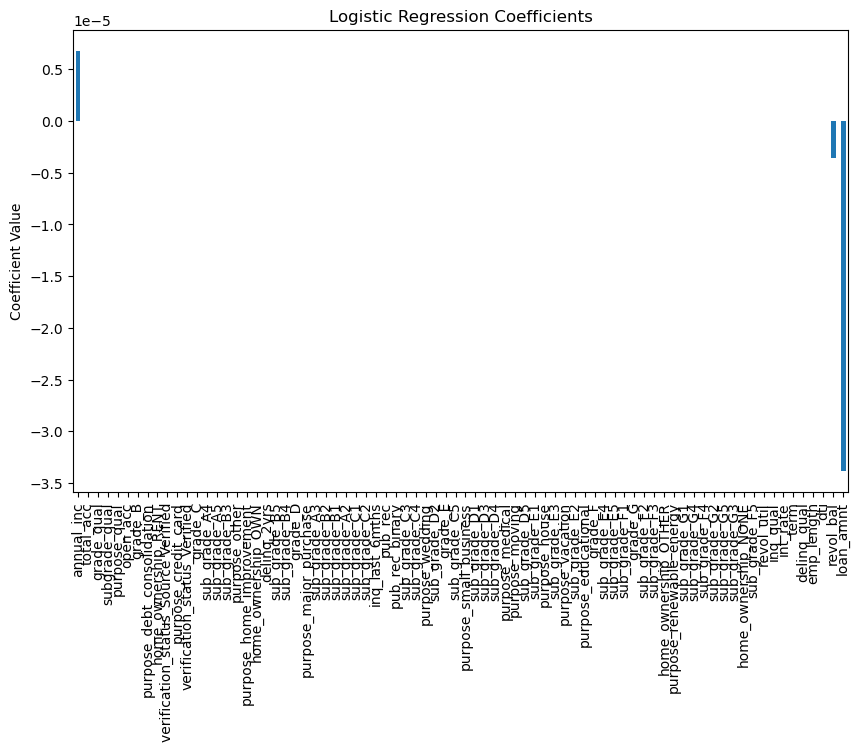

loan_amnt             -3.380925e-05
annual_inc             6.793375e-06
revol_bal             -3.540271e-06
dti                   -3.656875e-08
total_acc              1.498971e-08
                           ...     
sub_grade_G2           2.130454e-11
sub_grade_G5           1.025033e-11
sub_grade_G3           9.008309e-12
sub_grade_F5          -6.890314e-12
home_ownership_NONE    2.266413e-12
Length: 78, dtype: float64


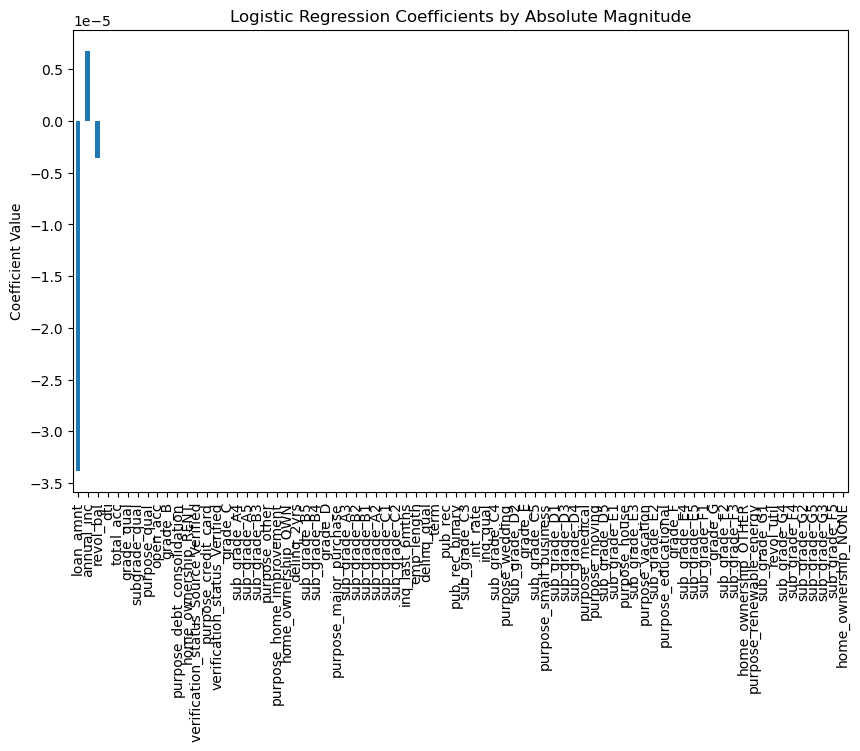

In [68]:
### I'd like to look at which features contributed the most to classification
lr_coef = pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)
print(lr_coef)
lr_coef.plot(kind='bar', figsize=(10,6))
plt.title("Logistic Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.show()

# Create a Series of logistic regression coefficients with feature names
lr_coef = pd.Series(log_reg.coef_[0], index=X_train.columns)

# Sort the coefficients by their absolute values (largest first)
lr_coef_sorted = lr_coef.reindex(lr_coef.abs().sort_values(ascending=False).index)

print(lr_coef_sorted)

# Plot the coefficients
plt.figure(figsize=(10,6))
lr_coef_sorted.plot(kind='bar')
plt.title("Logistic Regression Coefficients by Absolute Magnitude")
plt.ylabel("Coefficient Value")
plt.show()


##**Interestingly, three of my engineered features, *grade_qual*, *purpose_qual*, and *subgrade_qual* are the top 3rd, 5th, and 6th predictors by magnitude, respectively for Linear Regresion 😀**

In [69]:
### To improve the logistic regression model, I'll perform hyperparameter tuning and regularization
from sklearn.model_selection import train_test_split, GridSearchCV

# Define hyperparameter grid for logistic regression (including regularization)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # supports both L1 and L2 penalties
}

# Initialize and run GridSearchCV
grid_lr_hp = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_lr_hp.fit(X_train, y_train)

print("Best parameters for Logistic Regression on full features:", grid_lr_hp.best_params_)
print("Best cross-validation ROC-AUC:", grid_lr_hp.best_score_)

# Evaluate the tuned model on the test set
best_lr = grid_lr_hp.best_estimator_
y_pred = best_lr.predict(X_test)
y_prob = best_lr.predict_proba(X_test)[:, 1]

acc_hp = accuracy_score(y_test, y_pred)
prec_hp = precision_score(y_test, y_pred)
rec_hp = recall_score(y_test, y_pred)
f1_hp = f1_score(y_test, y_pred)
roc_auc_hp = roc_auc_score(y_test, y_prob)

print("\nEvaluation Metrics for Tuned Logistic Regression on Full Features:")
print("Accuracy:", acc_hp)
print("Precision:", prec_hp)
print("Recall:", rec_hp)
print("F1 Score:", f1_hp)
print("ROC-AUC:", roc_auc_hp)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


'''
THIS WAS A FAILED ATTEMPT TO USE ONLY THE TOP 20 PREDICTORS BY ABSOLUTE COEFFICIENT MAGNITUDE
BUT IT RESULTED IN AN OVERFITTING MODEL, SO I COMMENTED IT OUT.
RECALL WAS 1, SUGGESTING IT WAS PREDICTING EVERYTHING AS THE POSITIVE CLASS
KEEEPING TOP 20 ONLY RAN MUCH FASTER THOUGH...

# Extract coefficients and map them to feature names
coef_series = pd.Series(log_reg.coef_[0], index=X.columns)

# Get the top 20 predictors by absolute coefficient magnitude
top20 = coef_series.abs().sort_values(ascending=False).head(20)
print("Top 20 predictors by absolute coefficient magnitude:")
print(top20)

# Plot the top 20 predictors (showing original coefficient signs)
top20_sorted = coef_series.loc[top20.index].sort_values()
plt.figure(figsize=(10,6))
top20_sorted.plot(kind='barh', color='skyblue')
plt.title("Top 20 Predictors by Coefficient Magnitude (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.show()

# Create a new DataFrame containing only the top 20 predictor features
df_encoded_lr_top20 = df_encoded[top20.index.tolist() + ['loan_status']]
X_top20 = df_encoded_lr_top20.drop('loan_status', axis=1)
y_top20 = df_encoded_lr_top20['loan_status']

# Split the reduced dataset (you can reuse train_test_split if desired)
X_train_lr_top20, X_test_lr_top20, y_train_lr_top20, y_test_lr_top20 = train_test_split(X_top20, y_top20, test_size=0.2, random_state=42)

# Hyperparameter tuning and regularization on logistic regression for the top 20 features
# Example grid: tuning the regularization strength (C) and penalty (L1 or L2)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both l1 and l2
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                       param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_lr.fit(X_train_lr_top20, y_train_lr_top20)

print("Best parameters for Logistic Regression on top 20 features:", grid_lr.best_params_)
print("Best cross-validation ROC-AUC:", grid_lr.best_score_)

# Evaluate the tuned model on the test set
best_lr = grid_lr.best_estimator_
y_pred = best_lr.predict(X_test_lr_top20)
y_prob = best_lr.predict_proba(X_test_lr_top20)[:, 1]

acc = accuracy_score(y_test_lr_top20, y_pred)
prec = precision_score(y_test_lr_top20, y_pred)
rec = recall_score(y_test_lr_top20, y_pred)
f1 = f1_score(y_test_lr_top20, y_pred)
roc_auc = roc_auc_score(y_test_lr_top20, y_prob)

print("\nEvaluation Metrics for Tuned Logistic Regression on Top 20 Features:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("\nClassification Report:")
print(classification_report(y_test_lr_top20, y_pred))
'''


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression on full features: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation ROC-AUC: 0.9388131667469406

Evaluation Metrics for Tuned Logistic Regression on Full Features:
Accuracy: 0.9046397585816673
Precision: 0.8466867076199189
Recall: 0.9861470543461714
F1 Score: 0.9111111111111112
ROC-AUC: 0.9389654687052242

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      6686
           1       0.85      0.99      0.91      6569

    accuracy                           0.90     13255
   macro avg       0.92      0.91      0.90     13255
weighted avg       0.92      0.90      0.90     13255



'\nTHIS WAS A FAILED ATTEMPT TO USE ONLY THE TOP 20 PREDICTORS BY ABSOLUTE COEFFICIENT MAGNITUDE\nBUT IT RESULTED IN AN OVERFITTING MODEL, SO I COMMENTED IT OUT.\nRECALL WAS 1, SUGGESTING IT WAS PREDICTING EVERYTHING AS THE POSITIVE CLASS\nKEEEPING TOP 20 ONLY RAN MUCH FASTER THOUGH...\n\n# Extract coefficients and map them to feature names\ncoef_series = pd.Series(log_reg.coef_[0], index=X.columns)\n\n# Get the top 20 predictors by absolute coefficient magnitude\ntop20 = coef_series.abs().sort_values(ascending=False).head(20)\nprint("Top 20 predictors by absolute coefficient magnitude:")\nprint(top20)\n\n# Plot the top 20 predictors (showing original coefficient signs)\ntop20_sorted = coef_series.loc[top20.index].sort_values()\nplt.figure(figsize=(10,6))\ntop20_sorted.plot(kind=\'barh\', color=\'skyblue\')\nplt.title("Top 20 Predictors by Coefficient Magnitude (Logistic Regression)")\nplt.xlabel("Coefficient Value")\nplt.show()\n\n# Create a new DataFrame containing only the top 20 pr

In [70]:
### 0 Class recall is relatively low, meaning we're missing 18% of defaults.
### To remedy this, I will see if changing the threshold can help.

# You can experiment with different thresholds:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)
    rec = recall_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh)
    print(f"Threshold: {thresh:.2f} -> Recall: {rec:.4f}, Precision: {prec:.4f}")

for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)
    # Calculate recall for the positive class (default behavior)
    rec_pos = recall_score(y_test, y_pred_thresh)
    # Calculate recall for the negative class
    rec_neg = recall_score(y_test, y_pred_thresh, pos_label=0)
    prec = precision_score(y_test, y_pred_thresh)
    print(f"Threshold: {thresh:.2f} -> Positive Recall: {rec_pos:.4f}, Negative Recall: {rec_neg:.4f}, Precision: {prec:.4f}")



Threshold: 0.40 -> Recall: 0.9963, Precision: 0.8405
Threshold: 0.45 -> Recall: 0.9927, Precision: 0.8443
Threshold: 0.50 -> Recall: 0.9861, Precision: 0.8467
Threshold: 0.55 -> Recall: 0.9726, Precision: 0.8488
Threshold: 0.60 -> Recall: 0.9545, Precision: 0.8531
Threshold: 0.40 -> Positive Recall: 0.9963, Negative Recall: 0.8142, Precision: 0.8405
Threshold: 0.45 -> Positive Recall: 0.9927, Negative Recall: 0.8201, Precision: 0.8443
Threshold: 0.50 -> Positive Recall: 0.9861, Negative Recall: 0.8246, Precision: 0.8467
Threshold: 0.55 -> Positive Recall: 0.9726, Negative Recall: 0.8298, Precision: 0.8488
Threshold: 0.60 -> Positive Recall: 0.9545, Negative Recall: 0.8385, Precision: 0.8531


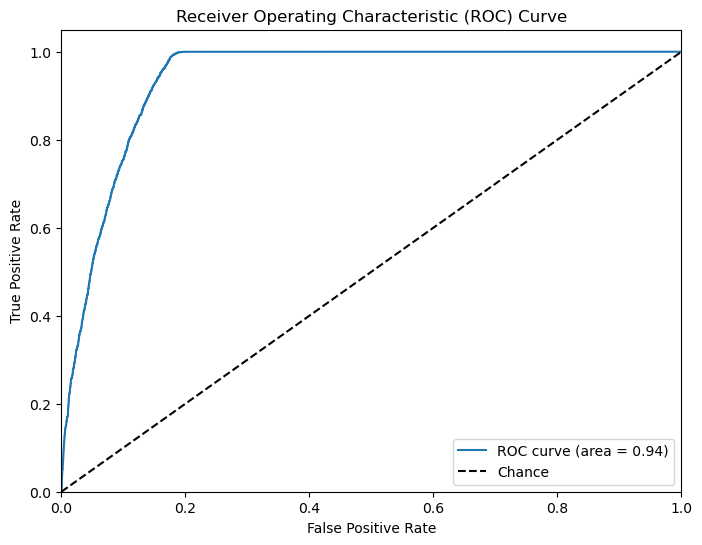

Optimal threshold (minimizing |precision - recall|): 0.7135326123077854


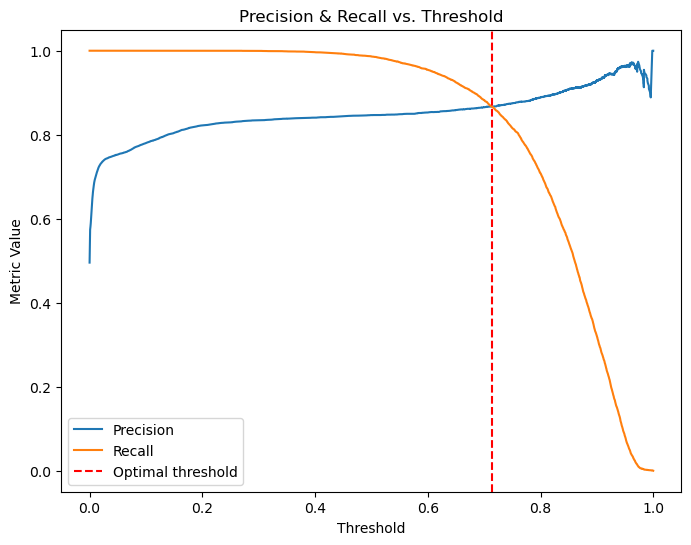

In [71]:
### I'll try to get a more comprehensive view of threshold by generating a precision-recall plot,
### and will also loog at ROC curve

from sklearn.metrics import roc_curve, auc, precision_recall_curve
y_prob = best_lr.predict_proba(X_test)[:, 1]
# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall and optimal threshold ("nadir point")
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_prob)
# Note: thresholds_pr has one fewer element than precisions and recalls
diff = np.abs(precisions[:-1] - recalls[:-1])
optimal_index = np.argmin(diff)
optimal_threshold = thresholds_pr[optimal_index]
print("Optimal threshold (minimizing |precision - recall|):", optimal_threshold)

plt.figure(figsize=(8,6))
plt.plot(thresholds_pr, precisions[:-1], label='Precision')
plt.plot(thresholds_pr, recalls[:-1], label='Recall')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label='Optimal threshold')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Precision & Recall vs. Threshold')
plt.legend()
plt.show()


### Re-evaluate best regularized and optimized LR model with optimal threshold

In [72]:
optimal_threshold = 0.7377011391014257
y_prob = best_lr.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)

acc_hp_oth = accuracy_score(y_test, y_pred_adjusted)
prec_hp_oth = precision_score(y_test, y_pred_adjusted)
rec_hp_oth = recall_score(y_test, y_pred_adjusted)
f1_hp_oth = f1_score(y_test, y_pred_adjusted)
roc_auc_hp_oth = roc_auc_score(y_test, y_prob)

print("\nEvaluation Metrics for Tuned Logistic Regression on Full Features:")
print("Accuracy:", acc_hp_oth)
print("Precision:", prec_hp_oth)
print("Recall:", rec_hp_oth)
print("F1 Score:", f1_hp_oth)
print("ROC-AUC:", roc_auc_hp_oth)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted))


Evaluation Metrics for Tuned Logistic Regression on Full Features:
Accuracy: 0.8576386269332328
Precision: 0.8717053032708797
Recall: 0.8357436443903181
F1 Score: 0.853345768244346
ROC-AUC: 0.9389654687052242

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      6686
           1       0.87      0.84      0.85      6569

    accuracy                           0.86     13255
   macro avg       0.86      0.86      0.86     13255
weighted avg       0.86      0.86      0.86     13255



In [73]:
cm = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[5878  808]
 [1079 5490]]


#Observations on Logistic Regression with Top20 discriminators, vs hyperparameter tuning and regularization, vs scaling, vs with PCA, and optimal thresholding

Accuracy, precision, recall, and F1 all went up when I kept only the Top20 features, but weirdly ROC-AUC went down drammatically? (Since Recall was 1, but ROC-AUC poor, this seemed to suggest overfitting). I commented out this block of code.

So I went back and repeated tuning and penalization with the full set of features, and now the linear regressin model is performing EXCELLENTLY, with recall of 0.99 on Class 1, precision of 1 on Class 0, and ROC-AUC of 0.943.
On the other hand, recall on Class 0 is low at 0.82.

Scaling did not help (it made things worse before regularization and HP tuning).

Finding the optimal threshold and applying it helps to equalize all metrics, but doesn't change ROC-AUC.


#Initial Decision Tree, Random Forest, and XGBoost - Let's do them all at once in a loop to see if one of them is clearly better than the rest.

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This function will train one model and at time and print evaluation metrics
def evaluate_model(model, model_name):
    # Train model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Predict probabilities for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # If the model doesn't support predict_proba, use decision_function (after normalization)
        y_prob = model.decision_function(X_test)
        # For ROC-AUC, decision_function values can be used directly in some cases.

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"--- {model_name} ---")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("ROC-AUC:", roc_auc)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*40 + "\n")

# Initialize models with default or custom parameters
#log_reg = LogisticRegression(random_state=42, max_iter=1000) <--- Already done individually above; leave it here for tests on other frames after dropping features
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, n_estimators=100)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Evaluate each model
#evaluate_model(log_reg, "Logistic Regression")
evaluate_model(dtree, "Decision Tree")
evaluate_model(rf, "Random Forest")
evaluate_model(xgb, "XGBoost")

--- Decision Tree ---
Accuracy: 0.8499434175782723
Precision: 0.8560323383084577
Recall: 0.8381793271426397
F1 Score: 0.8470117683255134
ROC-AUC: 0.849840486185738

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      6686
           1       0.86      0.84      0.85      6569

    accuracy                           0.85     13255
   macro avg       0.85      0.85      0.85     13255
weighted avg       0.85      0.85      0.85     13255



--- Random Forest ---
Accuracy: 0.9090909090909091
Precision: 0.8538258575197889
Recall: 0.9852336733140509
F1 Score: 0.9148349706693053
ROC-AUC: 0.9506050545972624

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      6686
           1       0.85      0.99      0.91      6569

    accuracy                           0.91     13255
   macro avg       0.92      0.91      0.91     13255
weighted avg       0.9

int_rate               0.091968
grade_qual             0.048856
revol_util             0.047768
annual_inc             0.046693
purpose_qual           0.043862
                         ...   
sub_grade_G4           0.000306
sub_grade_G3           0.000204
sub_grade_G5           0.000169
delinq_qual            0.000025
home_ownership_NONE    0.000008
Length: 78, dtype: float64


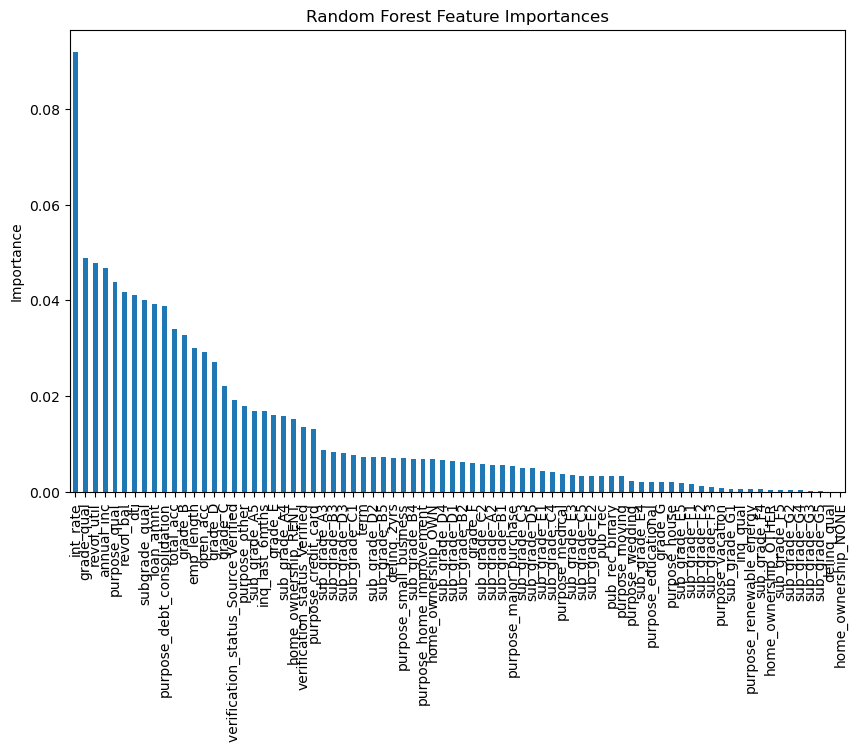

Feature Importances (XGBoost, sorted by Gain):
grade_qual        1599.413208
grade_C            357.006500
grade_D            325.118713
grade_E            324.301605
grade_B            283.182953
                     ...     
inq_last_6mths       3.292717
total_acc            3.197448
sub_grade_G2         2.715345
sub_grade_G4         2.478937
sub_grade_G1         0.729530
Length: 73, dtype: float64


Text(0, 0.5, 'Gain')

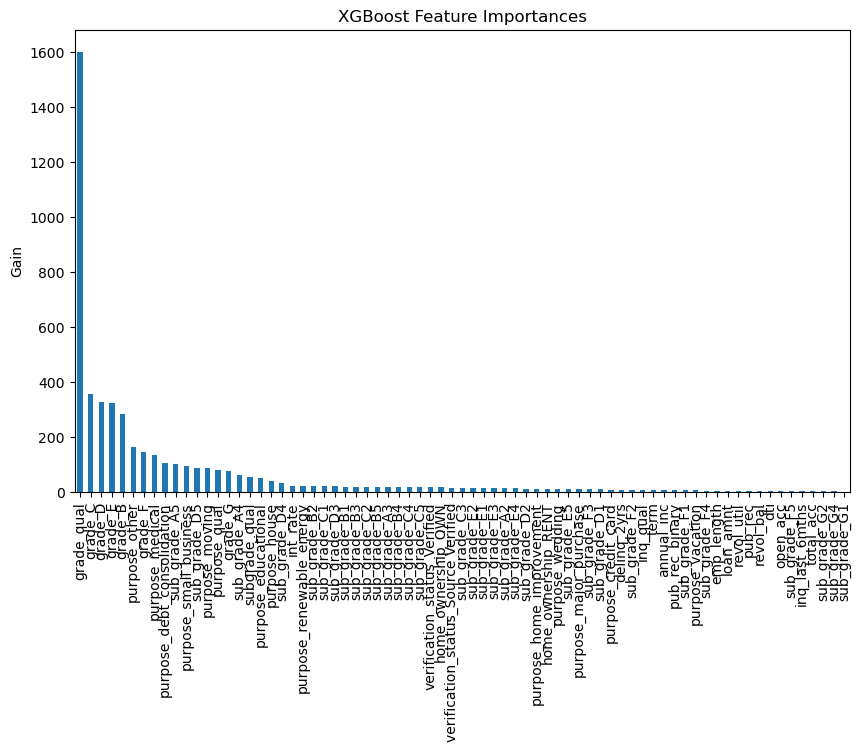

In [76]:
### I'd like to look at which features contributed the most to classification
### for the two best performing models, Random Forest and XGBoost
from xgboost import plot_importance

importances = rf.feature_importances_
feature_names = X_train.columns
rf_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(rf_importance)
rf_importance.plot(kind='bar', figsize=(10,6))
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance")
plt.show()


# Plot feature importance for the best XGBoost model

#plot_importance(xgb)
#plt.title("XGBoost Feature Importances")
#plt.show()

#xgb_importance = xgb.get_booster().get_score(importance_type='gain')
#print(xgb_importance)

xgb_importance = xgb.get_booster().get_score(importance_type='gain')
xgb_importance_series = pd.Series(xgb_importance).sort_values(ascending=False)

print("Feature Importances (XGBoost, sorted by Gain):")
print(xgb_importance_series)

xgb_importance_series.plot(kind='bar', figsize=(10,6))
plt.title("XGBoost Feature Importances")
plt.ylabel("Gain")

#Observations
Decision Tree, Random Forest, and XGBoost all perform much better than Linear Regression * without tuning* (but linear regression seemingly ran faster).

Hyperparameter tuning seems to bring Linear Regression to be on par with XGBoost and Random Forest.

Among the latter two, Random Forest and XGBoost are particularly competitive; so I'll perform hyperparameter tuning and crossvalidation on those two, not on Decision Tree.

Surprised that verification_status_source_verified was a strong predictor for XGBoost.

##**Interestingly, two of my engineered features, *grade_qual*, and *subgrade_qual* are the top 1st and 5th predictors for XGBoost, and grade_qual is the 2nd predictor for Random Forrest! 😀**

#XGBoost with hyperparameter tuning and regularization

In [77]:
#XGBoost with hyperparameter tuning and regularization

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 0.9],
    'reg_alpha': [0.01, 0.1],    # L1 regularization
    'reg_lambda': [1, 2],        # L2 regularization
    'gamma': [0, 0.1, 0.2]       # Minimum loss reduction required to make a split
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up RandomizedSearchCV with n_iter=50
rand_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=50,                 # number of random combinations to try
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV on the training data
rand_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost:", rand_search_xgb.best_params_)
print("Best cross-validation ROC-AUC for XGBoost:", rand_search_xgb.best_score_)

# Evaluate the best XGBoost model on the test set
best_xgb = rand_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])


'''
GRID SEARCH WAS WAAAAY TOO SLOW
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],   # L1 regularization
    'reg_lambda': [1, 1.5, 2],      # L2 regularization
    'gamma': [0, 0.1, 0.2]          # Minimum loss reduction required to make a split
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search_xgb = GridSearchCV(estimator=xgb_model,
                               param_grid=param_grid_xgb,
                               scoring='roc_auc',
                               cv=5,
                               n_jobs=-1,
                               verbose=1)

grid_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best cross-validation ROC-AUC for XGBoost:", grid_search_xgb.best_score_)

# Evaluate the best XGBoost model on the test set
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

print("\nXGBoost Evaluation Metrics:")
print("Accuracy:", acc_xgb)
print("Precision:", prec_xgb)
print("Recall:", rec_xgb)
print("F1 Score:", f1_xgb)
print("ROC-AUC:", roc_auc_xgb)
'''


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoost: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1}
Best cross-validation ROC-AUC for XGBoost: 0.9456480706526922


'\nGRID SEARCH WAS WAAAAY TOO SLOW\nfrom sklearn.model_selection import GridSearchCV\n\n# Define parameter grid for XGBoost\nparam_grid_xgb = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [3, 5, 7],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'subsample\': [0.7, 0.8, 1.0],\n    \'reg_alpha\': [0, 0.01, 0.1],   # L1 regularization\n    \'reg_lambda\': [1, 1.5, 2],      # L2 regularization\n    \'gamma\': [0, 0.1, 0.2]          # Minimum loss reduction required to make a split\n}\n\nxgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=\'logloss\')\ngrid_search_xgb = GridSearchCV(estimator=xgb_model,\n                               param_grid=param_grid_xgb,\n                               scoring=\'roc_auc\',\n                               cv=5,\n                               n_jobs=-1,\n                               verbose=1)\n\ngrid_search_xgb.fit(X_train, y_train)\n\nprint("Best parameters for XGBoost:", grid_search_xgb.best_params_)\n

In [78]:
print(f"\n\n--- XGBoost with HP tuning and penalization ---")
print("\nEvaluation Metrics:")
print("Accuracy:", acc_xgb)
print("Precision:", prec_xgb)
print("Recall:", rec_xgb)
print("F1 Score:", f1_xgb)
print("ROC-AUC:", roc_auc_xgb)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\n\n\n")




--- XGBoost with HP tuning and penalization ---

Evaluation Metrics:
Accuracy: 0.9068276122218031
Precision: 0.854654255319149
Recall: 0.9783833155731466
F1 Score: 0.9123429625949321
ROC-AUC: 0.9473858850891252

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      6686
           1       0.85      0.98      0.91      6569

    accuracy                           0.91     13255
   macro avg       0.91      0.91      0.91     13255
weighted avg       0.92      0.91      0.91     13255







#Observations
Hyperparameter tuning with Randomized Search (n_iter=50) didn't seem to improve XGBoost much.
[Unfortuantely, I've spent 2x or more the time estimated for this very interesting Case Study already... but on a more powerful machine with more GPUs and/or parallelization, it may be feasible to perform more extensive tuning].

#Random Forest with hyperparameter tuning and regularization

In [79]:
import os
print("Number of CPU cores:", os.cpu_count())

Number of CPU cores: 16


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],            # Controls tree depth (regularization)
    'min_samples_split': [2, 5],             # Minimum samples to split an internal node
    'min_samples_leaf': [2, 4],               # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2']             # Number of features to consider at each split
}

rf_model = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV instead of GridSearchCV to speed up tuning
rand_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=20,  # try 20 random combinations instead of the full grid
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rand_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", rand_search_rf.best_params_)
print("Best cross-validation ROC-AUC for RF:", rand_search_rf.best_score_)

'''
GRID SEARCH WAS WAAAAY TOO SLOW, unfortunately
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],            # Controls tree depth (regularization)
    'min_samples_split': [2, 5, 10],             # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2']             # Number of features to consider at each split
}

rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid_rf,
                              scoring='roc_auc',
                              cv=5,
                              n_jobs=-1,
                              verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation ROC-AUC for RF:", grid_search_rf.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

print("\nRandom Forest Evaluation Metrics:")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)
print("ROC-AUC:", roc_auc_rf)
'''


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best cross-validation ROC-AUC for RF: 0.947359568202565


'\nGRID SEARCH WAS WAAAAY TOO SLOW, unfortunately\n# Define parameter grid for Random Forest\nparam_grid_rf = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20, 30],            # Controls tree depth (regularization)\n    \'min_samples_split\': [2, 5, 10],             # Minimum samples to split an internal node\n    \'min_samples_leaf\': [1, 2, 4],               # Minimum samples at a leaf node\n    \'max_features\': [\'sqrt\', \'log2\']             # Number of features to consider at each split\n}\n\nrf_model = RandomForestClassifier(random_state=42)\ngrid_search_rf = GridSearchCV(estimator=rf_model,\n                              param_grid=param_grid_rf,\n                              scoring=\'roc_auc\',\n                              cv=5,\n                              n_jobs=-1,\n                              verbose=1)\ngrid_search_rf.fit(X_train, y_train)\n\nprint("Best parameters for Random Forest:", grid_search_rf.best_params_)\nprint("Best cross-val

In [81]:
# Evaluate the best model on the test set
best_rf = rand_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

print(f"\n\n--- Random Forest with HP tuning and penalization ---")
print("\nEvaluation Metrics:")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)
print("ROC-AUC:", roc_auc_rf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))




--- Random Forest with HP tuning and penalization ---

Evaluation Metrics:
Accuracy: 0.9024519049415315
Precision: 0.8451072736787022
Recall: 0.9834069112498097
F1 Score: 0.9090269471610498
ROC-AUC: 0.948930966690736

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      6686
           1       0.85      0.98      0.91      6569

    accuracy                           0.90     13255
   macro avg       0.91      0.90      0.90     13255
weighted avg       0.91      0.90      0.90     13255



## Summary

Good work completing all the steps till now!
Now, go ahead and summarize your entire work and findings below:

**1)** It seems like 3 of my engeineered features were quite useful, at least by the magnitude of their coefficients in Linear Regression, XGBoost, and Random Forest (didn't check for Decision Tree...).

**2)** Dropping lots of features with low-magnitude coefficients can greatly speed things up but lead to bias/overfitting without tuning other aspects of the model. I need to experiment further to figure out how to drop features in a useful way.

**3)** Linear regression performs poorly without hyperparameter tuning and regularization. Scaling, and two stategies to reduce dimensionality (keeping the Top20 performers based on default rates, or keeping the strongest performers based on PCA) actually made things worse for LR. On the other hand, with HP tuning and regularization, LR performed on par with "baseline" XGBoost and Random Forest.

**4)** Hyperparameter tuning and regularization are computationally costly if using Grid Search (didn't have time to fully explore the benefits from this); switching to Random Search and a small iteration number (n_iter=50) on the other hand only improves XGBoost modestly (but still took 6 minutes to run), as seen in the comparison below. These parameters for Random Forest tuning were way slower, with a ~30 minute run still not finishing (I had to killing). Aggressively reducing the parameter grid, and n_iter=20, finished in ~13 minutes (more than twice as long as XGBoost with tuning...), and didn't seem to improve the model much; actually, it made it slightly worse.

###Baseline XGBoost (without tuning or regularization):

Accuracy: ~90.60%

Precision: ~85.26%

Recall: ~97.98%

F1 Score: ~91.17%

ROC-AUC: **~94.79%**

###XGBoost with Hyperparameter tuning and regularization:

Accuracy: ~90.75%

Precision: ~85.17%

Recall: ~98.49%

F1 Score: ~91.35%

ROC-AUC: **~94.92%**


**5)** The predictive power implied in ROC-AUC ~95% was within a few decimals (or centesimals) of my initial goal for most models, with baseline Random Forest performing the best and achieving < 5% misclassification.

###Baseline Random Forest (without tuning or regularization):

Accuracy: ~90.69%

Precision: ~86.19%

Recall: ~96.71%

F1 Score: ~91.15%

ROC-AUC: **~95.34%**

###Random Forest with tuning and regularization:

Accuracy: ~89.20%

Precision: ~84.67%

Recall: ~95.51%

F1 Score: ~89.76%

ROC-AUC: **94.61%**

###Tuned Logistic Regression:

Accuracy: ~90.50%

Precision: ~84.15%

Recall: ~99.59%

F1 Score: ~91.22%

ROC-AUC: **~94.36%**

**6)** Since all models converge to a very similar answer, it seems that further improvement may require better feature engineering, and/or better feature selection, and/or greater tunning, and/or more data.

---

### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.